# Proyecto - Entrega Final

Alumno: Javier López Malone

Profesora: Daniela Putrino

Tutor: Virginia Marich

## Información del dataset

> Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo (variable y).

### Datos del cliente bancario:

**Edad** (numérica): edad del cliente.

**Tipo de Trabajo** (categórica): 'gestión', 'obrero', 'emprendedor', 'empleado doméstico', 'administrativo', 'jubilado', 'autónomo', 'servicios', 'estudiante', ' técnico', 'desempleado', 'desconocido'.

**Estado Civil** (categórica):  'divorciado', 'casado', 'soltero', 'desconocido'. Nota: 'divorciado' contempla divorciado o viudo.

**Educación** (categórica): 'primario', 'secundario', 'terciario', 'desconocido'.

**Incumplimiento** (categórica): ¿tiene crédito en incumplimiento? 'si', 'no'.

**Hipoteca** (categórica): ¿tiene préstamo de vivienda? 'si', 'no'

**Préstamo** (categórica): ¿tiene préstamo personal? 'si', 'no'

### Datos de la campaña:

**Contacto** (categórica): tipo de comunicación del contacto 'celular', 'teléfono'.

**Mes** (categórica): mes del año del último contacto 'ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic'

**Día** (categórica): día de la semana 'lun', 'mar', 'mie', 'jue', 'vie'.

**Duración** (numérica): duración del último contacto, en segundos. Nota importante: este atributo afecta en gran medida el objetivo de salida (por ejemplo, si duración=0 entonces y='no'). Sin embargo, no se conoce la duración antes de realizar una llamada. Además, después del final de la llamada, obviamente se conoce y.
Por lo tanto, esta entrada sólo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

### Otros atributos:

**Campaña** (numérica): número de contactos realizados durante la campaña al cliente (incluye el último contacto).

**Días transcurridos** (numérica): número de días transcurridos después de que el cliente fue contactado por última vez desde una campaña anterior. Nota: 999 significa que el cliente no fue contactado previamente.

**Contacto Anterior** (numérica): número de contactos realizados antes de esta campaña a este cliente.

**Resultado** (categórica): resultado de la campaña de marketing anterior 'éxito', 'fracaso', 'desconocido'.

### Datos de contexto socio-económico

**Emp.var.rate** (numérica): tasa de variación del empleo, indicador trimestral

**Cons.price.idx** (numérica): índice de precios al consumidor, indicador mensual.

**Cons.conf.idx** (numérica): índice de confianza del consumidor, indicador mensual.

**Euribor3m** (numérica): tipo de cambio euribor a 3 meses, indicador diario.

**Nr.empleados** (numérica): número de empleados, indicador trimestral.

## Importación de librerías y dataset

In [44]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
import os
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/Cursos/DataScienceII_Challenge/datasets/bank-additional-full.csv',sep=';')
pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.10           93.99         -36.40       4.86      5191.00  no  
1          1.10           93.99         -36.40       4.86      5191.00  no  
2          1.10           93.99         -36.40       4.86      5191.00  no  
3          1.10           93.99         -36.40       4.86      5191.00  no  
4          1.10           93.99         -36.40       4.86      5191.00  no

Los datos del dataset fueron recolectados entre el año 2008 y 2013. En el análisis, se ha asumido que los datos del dataset corresponden al año 2013. Esta decisión se fundamenta en la necesidad de cumplir con los requisitos del trabajo, y poder cruzar con información adicional obtenida a través de una API específica, dado que el dataset no muestra el año de captura del dato.

Se crea un dataframe a partir de los datos de la tasa de desempleo mensual para el año 2013, obtenido del instituto de estadística de portugal.

In [45]:
import requests

def fetch_data(period_code):
    url = f"https://www.ine.pt/ine/json_indicador/pindica.jsp?op=2&varcd=0007976&Dim1={period_code}&Dim2=PT&Dim3=T&lang=PT"
    response = requests.get(url)
    response.raise_for_status()  
    return response.json()

def process_data(json_data, period):
    prop = period['period_text']
    data = json_data[0]['Dados'][prop]
    
    processed_data = []
    for item in data:
        processed_data.append({
            'month': period['month'],
            'unemployment rate': float(item['valor'])
        })
    return processed_data

monthly_code = "S3A"
year = 2013
start_month = 1
end_month = 12
periods = []

month_names = {
    1: "Janeiro", 
    2: "Fevereiro", 
    3: "Março", 
    4: "Abril",
    5: "Maio", 
    6: "Junho", 
    7: "Julho", 
    8: "Agosto",
    9: "Setembro", 
    10: "Outubro", 
    11: "Novembro", 
    12: "Dezembro"
}

for p in range(start_month, end_month + 1):
    code = f"{monthly_code}{year}{p:02d}"
    period_object = {
        "code": code,
        "year": str(year),
        "month": f"{p:02d}",
        "month_text": month_names[p],
        "period_text": f"{month_names[p]} de {year}"
    }
    periods.append(period_object)

all_data = []
for period in periods:
    json_data = fetch_data(period['code'])
    period_data = process_data(json_data,period)
    all_data.extend(period_data)

df_unemployment_rate = pd.DataFrame(all_data)
df_unemployment_rate

month  unemployment rate
0     01              18.60
1     02              18.60
2     03              18.40
3     04              17.90
4     05              17.50
5     06              16.90
6     07              16.90
7     08              16.50
8     09              16.30
9     10              16.30
10    11              16.20
11    12              16.00

Se crea otro dataframe a partir de los datos del promedio de salario por grupo etario obtenido del instituto de estadística de portugal.

In [46]:
import requests

def fetch_data():
    url = f"https://www.ine.pt/ine/json_indicador/pindica.jsp?op=2&varcd=0006910&Dim1=S7A2014&Dim2=PT&Dim3=T&lang=PT"
    response = requests.get(url)
    response.raise_for_status()  
    return response.json()

def process_data(json_data, group):
    prop = group['group_text']
    data = json_data[0]['Dados']['2014']
    filtered_items = [item for item in data if item["dim_4_t"] == prop]
    
    processed_data = []
    for item in filtered_items:
        processed_data.append({
            'age_group': prop,
            'avg. salary': float(item['valor'])
        })
    return processed_data

groups = []

age_group = {
    0: "Desconhecido", 
    1: "Menos de 18 anos", 
    2: "18 - 24 anos", 
    3: "25 - 34 anos", 
    4: "35 - 44 anos",
    5: "45 - 54 anos", 
    6: "55 - 64 anos", 
    7: "65 e mais anos"
}

for group in range(0, 7):
    group_object = {
        "group": f"{group}",
        "group_text": age_group[group]
    }
    groups.append(group_object)

all_data = []
for group in groups:
    json_data = fetch_data()
    group_data = process_data(json_data,group)
    all_data.extend(group_data)

df_avg_salary_by_age_group = pd.DataFrame(all_data)
df_avg_salary_by_age_group

age_group  avg. salary
0      Desconhecido      1473.79
1  Menos de 18 anos       673.39
2      18 - 24 anos       607.62
3      25 - 34 anos       785.84
4      35 - 44 anos       966.45
5      45 - 54 anos       974.94
6      55 - 64 anos      1028.74

In [47]:
month_map = {
    'jan': '01', 
    'feb': '02', 
    'mar': '03', 
    'apr': '04',
    'may': '05',
    'jun': '06',
    'jul': '07',
    'aug': '08',
    'sep': '09',
    'oct': '10',
    'nov': '11',
    'dec': '12'
}
df['month'] = df['month'].map(month_map)
df = df.merge(df_unemployment_rate, on='month', how='left')
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone    05         mon       261         1    999         0   
1      telephone    05         mon       149         1    999         0   
2      telephone    05         mon       226         1    999         0   
3      telephone    05         mon       151         1    999         0   
4      telephone    05         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular    11         fri       334         1    999         0   
41184   cellular    11         fri       383         1    999         0   
41185   cellular    11         fri       189         2    999         0   
41186   cellular    11         fri       442         1    999         0   
41187   cellular    11         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.10           93.99         -36.40       4.86   
1      nonexistent          1.10           93.99         -36.40       4.86   
2      nonexistent          1.10           93.99         -36.40       4.86   
3      nonexistent          1.10           93.99         -36.40       4.86   
4      nonexistent          1.10           93.99         -36.40       4.86   
...            ...           ...             ...            ...        ...   
41183  nonexistent         -1.10           94.77         -50.80       1.03   
41184  nonexistent         -1.10           94.77         -50.80       1.03   
41185  nonexistent         -1.10           94.77         -50.80       1.03   
41186  nonexistent         -1.10           94.77         -50.80       1.03   
41187      failure         -1.10           94.77         -50.80       1.03   

       nr.employed    y  unemployment rate  
0          5191.00   no              17.50  
1          5191.00   no              17.50  
2          5191.00   no              17.50  
3          5191.00   no              17.50  
4          5191.00   no              17.50  
...            ...  ...                ...  
41183      4963.60  yes              16.20  
41184      4963.60   no              16.20  
41185      4963.60   no              16.20  
41186      4963.60  yes              16.20  
41187      4963.60   no              16.20  

[41188 rows x 22 columns]

In [48]:
def categorize_age(age):
    if age < 18:
        return 'Menos de 18 anos'
    elif 18 <= age <= 24:
        return '18 - 24 anos'
    elif 25 <= age <= 34:
        return '25 - 34 anos'
    elif 35 <= age <= 44:
        return '35 - 44 anos'
    elif 45 <= age <= 54:
        return '45 - 54 anos'
    elif 55 <= age <= 64:
        return '55 - 64 anos'
    else:
        return 'Desconhecido'

df['age_group'] = df['age'].apply(categorize_age)
df = df.merge(df_avg_salary_by_age_group, on='age_group', how='left')
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone    05         mon       261         1    999         0   
1      telephone    05         mon       149         1    999         0   
2      telephone    05         mon       226         1    999         0   
3      telephone    05         mon       151         1    999         0   
4      telephone    05         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular    11         fri       334         1    999         0   
41184   cellular    11         fri       383         1    999         0   
41185   cellular    11         fri       189         2    999         0   
41186   cellular    11         fri       442         1    999         0   
41187   cellular    11         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.10           93.99         -36.40       4.86   
1      nonexistent          1.10           93.99         -36.40       4.86   
2      nonexistent          1.10           93.99         -36.40       4.86   
3      nonexistent          1.10           93.99         -36.40       4.86   
4      nonexistent          1.10           93.99         -36.40       4.86   
...            ...           ...             ...            ...        ...   
41183  nonexistent         -1.10           94.77         -50.80       1.03   
41184  nonexistent         -1.10           94.77         -50.80       1.03   
41185  nonexistent         -1.10           94.77         -50.80       1.03   
41186  nonexistent         -1.10           94.77         -50.80       1.03   
41187      failure         -1.10           94.77         -50.80       1.03   

       nr.employed    y  unemployment rate     age_group  avg. salary  
0          5191.00   no              17.50  55 - 64 anos      1028.74  
1          5191.00   no              17.50  55 - 64 anos      1028.74  
2          5191.00   no              17.50  35 - 44 anos       966.45  
3          5191.00   no              17.50  35 - 44 anos       966.45  
4          5191.00   no              17.50  55 - 64 anos      1028.74  
...            ...  ...                ...           ...          ...  
41183      4963.60  yes              16.20  Desconhecido      1473.79  
41184      4963.60   no              16.20  45 - 54 anos       974.94  
41185      4963.60   no              16.20  55 - 64 anos      1028.74  
41186      4963.60  yes              16.20  35 - 44 anos       966.45  
41187      4963.60   no              16.20  Desconhecido      1473.79  

[41188 rows x 24 columns]

Muevo la columna objetivo al final.

In [49]:
columns = list(df.columns)

columns.remove('y')
columns.append('y')

df = df[columns]
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone    05         mon       261         1    999         0   
1      telephone    05         mon       149         1    999         0   
2      telephone    05         mon       226         1    999         0   
3      telephone    05         mon       151         1    999         0   
4      telephone    05         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular    11         fri       334         1    999         0   
41184   cellular    11         fri       383         1    999         0   
41185   cellular    11         fri       189         2    999         0   
41186   cellular    11         fri       442         1    999         0   
41187   cellular    11         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.10           93.99         -36.40       4.86   
1      nonexistent          1.10           93.99         -36.40       4.86   
2      nonexistent          1.10           93.99         -36.40       4.86   
3      nonexistent          1.10           93.99         -36.40       4.86   
4      nonexistent          1.10           93.99         -36.40       4.86   
...            ...           ...             ...            ...        ...   
41183  nonexistent         -1.10           94.77         -50.80       1.03   
41184  nonexistent         -1.10           94.77         -50.80       1.03   
41185  nonexistent         -1.10           94.77         -50.80       1.03   
41186  nonexistent         -1.10           94.77         -50.80       1.03   
41187      failure         -1.10           94.77         -50.80       1.03   

       nr.employed  unemployment rate     age_group  avg. salary    y  
0          5191.00              17.50  55 - 64 anos      1028.74   no  
1          5191.00              17.50  55 - 64 anos      1028.74   no  
2          5191.00              17.50  35 - 44 anos       966.45   no  
3          5191.00              17.50  35 - 44 anos       966.45   no  
4          5191.00              17.50  55 - 64 anos      1028.74   no  
...            ...                ...           ...          ...  ...  
41183      4963.60              16.20  Desconhecido      1473.79  yes  
41184      4963.60              16.20  45 - 54 anos       974.94   no  
41185      4963.60              16.20  55 - 64 anos      1028.74   no  
41186      4963.60              16.20  35 - 44 anos       966.45  yes  
41187      4963.60              16.20  Desconhecido      1473.79   no  

[41188 rows x 24 columns]

#### Funciones auxiliares

Funciones que se utilizarán en el documento.

In [50]:

# HELPER FUNCTIONS

from enum import Enum
from tabulate import tabulate

class OutliersTreatment(Enum):
    DoNothing = 0
    Delete = 1
    Truncate = 2
    ApplyMean = 3
    ApplyMedian = 4


def describe_data(dataFrame: pd.DataFrame) -> pd.DataFrame:
    desc = df.describe().T

    mode_values = df.select_dtypes(include=['float64', 'int64']).mode().iloc[0] 

    desc['mode'] = mode_values
    
    return desc


def get_outliers_IQR(dataFrame: pd.DataFrame, columns:str|list=None, treatment:OutliersTreatment=OutliersTreatment.DoNothing):
    """
    Calcula los valores atípicos de las columnas del dataframe según el rango intercuartílico (IQR)
    
    Returns:
        dataFrame: DataFrame con los valores atípicos tratados
        outliers: DataFrame con los valores atípicos
    """
    not_processed_columns = None
    
    if columns is None:
        not_processed_columns = dataFrame.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
        columns = dataFrame.select_dtypes(include=['float64', 'int64']).columns.tolist()
    else:
        not_processed_columns = dataFrame[columns].select_dtypes(exclude=['float64', 'int64']).columns.tolist()
        columns = dataFrame[columns].select_dtypes(include=['float64', 'int64']).columns.tolist()
        
    if not not_processed_columns is None and len(not_processed_columns)>0:
        print(f"Columnas no procesadas:\n{not_processed_columns}\n")
    
    if columns:
        Q1 = dataFrame[columns].quantile(0.25)
        Q3 = dataFrame[columns].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = (dataFrame[columns] < lower_bound) | (dataFrame[columns] > upper_bound)

        if treatment == OutliersTreatment.Delete:
            dataFrame = dataFrame[~outliers.any(axis=1)]
        elif treatment == OutliersTreatment.Truncate:
            for column in columns:
                dataFrame[column] = np.where(
                                        dataFrame[column] < lower_bound[column], lower_bound[column],
                                        np.where(dataFrame[column] > upper_bound[column], upper_bound[column], 
                                        dataFrame[column])
                                    )
        elif treatment == OutliersTreatment.ApplyMean:
            for column in columns:
                mean_value = dataFrame[column].mean()
                dataFrame[column] = np.where(outliers[column], mean_value, dataFrame[column])
        elif treatment == OutliersTreatment.ApplyMedian:
           for column in columns:
                median_value = dataFrame[column].median()
                dataFrame[column] = np.where(outliers[column], median_value, dataFrame[column])
                        
        return (dataFrame, outliers)
    else:
        return None
    
    
def show_outliers_info(dataFrame: pd.DataFrame, columns:str|list=None, summary:bool=True):
    """
    Obtiene la inforamción de los valores atípicos de las columnas del dataframe.
    
    Returns:
        outliers: DataFrame con los valores atípicos
    """
    if columns is None:
        columns = dataFrame.select_dtypes(include=['float64', 'int64']).columns.tolist()
    else:
        columns = dataFrame[columns].select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    
    _, outliers = get_outliers_IQR(dataFrame, columns)
    
    if summary:
        outliers_count = outliers.sum()

        table_data = []

        for column, outlier_count in outliers_count.items():
            if column in columns:
                outliers_column_percentage = outlier_count / dataFrame[column].count() * 100
                table_data.append([column, outlier_count, f"{outliers_column_percentage:.2f}%"])

        total_outliers_count = outliers_count.sum()
        total_data_points = dataFrame.select_dtypes(include=['float64', 'int64']).count().sum()
        total_percentage = total_outliers_count / total_data_points * 100

        total_row = ['Total', total_outliers_count, f"{total_percentage:.2f}%"]

        headers = ['Columna', 'Outliers', '% del total']

        table_data = sorted(table_data, key=lambda x: x[1], reverse=True)
        table_data.append(total_row) 

        print(tabulate(table_data, headers=headers, tablefmt='pretty'))
    else:
        for column in columns:
            print(f"{column}: {outliers[column].sum()} outliers")
            print(dataFrame[column][outliers[column] == True].head())
            
    print()
    
    return outliers


def get_elapsed_time(start_time, end_time):
    elapsed_time = end_time - start_time
    hours, remainder = divmod(elapsed_time, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"[{int(hours)}:{int(minutes)}:{seconds:.2f}]"

### Traducción de valores y columnas

Establezco todos los valores y columnas en español por preferencia personal.

In [51]:
job_translations = {
    'management':'gestión',
    'technician':'técnico',
    'entrepreneur':'emprendedor',
    'blue-collar':'obrero',
    'retired':'jubilado',
    'admin.':'administrativo',
    'services':'servicios',
    'self-employed':'autónomo',
    'unemployed':'desempleado',
    'housemaid':'servicio doméstico',
    'student':'estudiante',
    'unknown':'desconocido'
}
df['job'] = df['job'].replace(job_translations)

marital_status_translations = {
    'married':'casado/a',
    'single':'soltero/a',
    'divorced':'divorciado/a',
    'unknown':'desconocido'
}
df['marital'] = df['marital'].replace(marital_status_translations)

education_translations = {
    'basic.4y':'básica 4 años',
    'basic.6y':'básica 6 años',
    'basic.9y':'básica 9 años',
    'high.school':'bachillerato',
    'professional.course':'curso profesional',
    'university.degree':'grado universitario',
    'illiterate':'analfabeto',
    'unknown':'desconocido'
}
df['education'] = df['education'].replace(education_translations)

contact_translations = {
    'cellular':'celular',
    'telephone':'teléfono',
    'unknown':'desconocido'
}
df['contact'] = df['contact'].replace(contact_translations)

month_translations = {
    'jan':'ene',
    'feb':'feb',
    'mar':'mar',
    'apr':'abr',
    'may':'may',
    'jun':'jun',
    'jul':'jul',
    'aug':'ago',
    'sep':'sep',
    'oct':'oct',
    'nov':'nov',
    'dec':'dic'
}
df['month'] = df['month'].replace(month_translations)

day_of_week_translations = {
    'mon':'lun',
    'tue':'mar',
    'wen':'mie',
    'thu':'jue',
    'fri':'vie'
}
df['day_of_week'] = df['day_of_week'].replace(day_of_week_translations)

poutcome_translations = {
    'success':'éxito',
    'failure':'fracaso',
    'nonexistent':'desconocido'
}
df['poutcome'] = df['poutcome'].replace(poutcome_translations)

yes_no_translations = {
    'yes':'si',
    'unknown':'desconocido'
}
df['default'] = df['default'].replace(yes_no_translations)
df['housing'] = df['housing'].replace(yes_no_translations)
df['loan'] = df['loan'].replace(yes_no_translations)
df['y'] = df['y'].replace(yes_no_translations)

age_group_translations = {
    'Menos de 18 anos':'Menos de 18 años',
    '18 - 24 anos':'18 - 24 años',
    '25 - 34 anos':'25 - 34 años',
    '35 - 44 anos':'35 - 44 años',
    '45 - 54 anos':'45 - 54 años',
    '55 - 64 anos':'55 - 64 años'
}
df['age_group'] = df['age_group'].replace(age_group_translations)



class Col:
    AGE = "Edad"
    JOB = "Tipo de trabajo"
    MARITAL = "Estado civil"
    EDUCATION = "Educación"
    DEFAULT = "Incumplimientos"
    BALANCE = "Balance"
    HOUSING = "Hipoteca"
    LOAN = "Préstamos"
    CONTACT = "Contacto"
    FIRST_CONTACT = "Primer contacto"
    MONTH = "Mes"
    DAY_OF_WEEK = "Día semana"
    DURATION = "Duración"
    CAMPAIGN = "Campaña"
    PDAYS = "Días transcurridos"
    PREVIOUS = "Contacto anterior"
    POUTCOME = "Resultado"
    EMP_VAR_RATE = "Tasa var. empleo"
    IPC = "IPC"
    CONS_CONF_IDX = "Idx confianza consum."
    EURIBOR3M = "Euribor 3M"
    NR_EMPLOYED = "Nr. empleados"
    Y = "Y"
    UNEMP_RATE = "Tasa desempleo"
    AGE_GROUP = "Grupo etario"
    AVG_SALARY = "Salario promedio"
    
columns_translations = {
    'age': Col.AGE,
    'job': Col.JOB,
    'marital': Col.MARITAL,
    'education': Col.EDUCATION,
    'default': Col.DEFAULT,
    'balance': Col.BALANCE,
    'housing': Col.HOUSING,
    'loan': Col.LOAN,
    'contact': Col.CONTACT,
    'month': Col.MONTH,
    'day_of_week': Col.DAY_OF_WEEK,
    'duration': Col.DURATION,
    'campaign': Col.CAMPAIGN,
    'pdays': Col.PDAYS,
    'previous': Col.PREVIOUS,
    'poutcome': Col.POUTCOME,
    'emp.var.rate': Col.EMP_VAR_RATE,
    'cons.price.idx': Col.IPC,
    'cons.conf.idx': Col.CONS_CONF_IDX,
    'euribor3m': Col.EURIBOR3M,
    'nr.employed': Col.NR_EMPLOYED,
    "unemployment rate": Col.UNEMP_RATE,
    "age_group": Col.AGE_GROUP,
    "avg. salary": Col.AVG_SALARY,
    'y': Col.Y
}
df.rename(columns=columns_translations, inplace=True)

### Descripción del dataset

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   41188 non-null  int64  
 1   Tipo de trabajo        41188 non-null  object 
 2   Estado civil           41188 non-null  object 
 3   Educación              41188 non-null  object 
 4   Incumplimientos        41188 non-null  object 
 5   Hipoteca               41188 non-null  object 
 6   Préstamos              41188 non-null  object 
 7   Contacto               41188 non-null  object 
 8   Mes                    41188 non-null  object 
 9   Día semana             41188 non-null  object 
 10  Duración               41188 non-null  int64  
 11  Campaña                41188 non-null  int64  
 12  Días transcurridos     41188 non-null  int64  
 13  Contacto anterior      41188 non-null  int64  
 14  Resultado              41188 non-null  object 
 15  Ta

In [53]:
describe_data(df)

count    mean    std     min     25%     50%     75%  \
Edad                  41188.00   40.02  10.42   17.00   32.00   38.00   47.00   
Duración              41188.00  258.29 259.28    0.00  102.00  180.00  319.00   
Campaña               41188.00    2.57   2.77    1.00    1.00    2.00    3.00   
Días transcurridos    41188.00  962.48 186.91    0.00  999.00  999.00  999.00   
Contacto anterior     41188.00    0.17   0.49    0.00    0.00    0.00    0.00   
Tasa var. empleo      41188.00    0.08   1.57   -3.40   -1.80    1.10    1.40   
IPC                   41188.00   93.58   0.58   92.20   93.08   93.75   93.99   
Idx confianza consum. 41188.00  -40.50   4.63  -50.80  -42.70  -41.80  -36.40   
Euribor 3M            41188.00    3.62   1.73    0.63    1.34    4.86    4.96   
Nr. empleados         41188.00 5167.04  72.25 4963.60 5099.10 5191.00 5228.10   
Tasa desempleo        41188.00   17.03   0.53   16.00   16.50   16.90   17.50   
Salario promedio      41188.00  912.50 125.52  607.62  785.84  966.45  974.94   

                          max    mode  
Edad                    98.00   31.00  
Duración              4918.00   85.00  
Campaña                 56.00    1.00  
Días transcurridos     999.00  999.00  
Contacto anterior        7.00    0.00  
Tasa var. empleo         1.40    1.40  
IPC                     94.77   93.99  
Idx confianza consum.  -26.90  -36.40  
Euribor 3M               5.04    4.86  
Nr. empleados         5228.10 5228.10  
Tasa desempleo          18.40   17.50  
Salario promedio      1473.79  785.84

In [54]:
df.head(10)

Edad     Tipo de trabajo Estado civil          Educación Incumplimientos  \
0    56  servicio doméstico     casado/a      básica 4 años              no   
1    57           servicios     casado/a       bachillerato     desconocido   
2    37           servicios     casado/a       bachillerato              no   
3    40      administrativo     casado/a      básica 6 años              no   
4    56           servicios     casado/a       bachillerato              no   
5    45           servicios     casado/a      básica 9 años     desconocido   
6    59      administrativo     casado/a  curso profesional              no   
7    41              obrero     casado/a        desconocido     desconocido   
8    24             técnico    soltero/a  curso profesional              no   
9    25           servicios    soltero/a       bachillerato              no   

  Hipoteca Préstamos  Contacto Mes Día semana  Duración  Campaña  \
0       no        no  teléfono  05        lun       261        1   
1       no        no  teléfono  05        lun       149        1   
2       si        no  teléfono  05        lun       226        1   
3       no        no  teléfono  05        lun       151        1   
4       no        si  teléfono  05        lun       307        1   
5       no        no  teléfono  05        lun       198        1   
6       no        no  teléfono  05        lun       139        1   
7       no        no  teléfono  05        lun       217        1   
8       si        no  teléfono  05        lun       380        1   
9       si        no  teléfono  05        lun        50        1   

   Días transcurridos  Contacto anterior    Resultado  Tasa var. empleo   IPC  \
0                 999                  0  desconocido              1.10 93.99   
1                 999                  0  desconocido              1.10 93.99   
2                 999                  0  desconocido              1.10 93.99   
3                 999                  0  desconocido              1.10 93.99   
4                 999                  0  desconocido              1.10 93.99   
5                 999                  0  desconocido              1.10 93.99   
6                 999                  0  desconocido              1.10 93.99   
7                 999                  0  desconocido              1.10 93.99   
8                 999                  0  desconocido              1.10 93.99   
9                 999                  0  desconocido              1.10 93.99   

   Idx confianza consum.  Euribor 3M  Nr. empleados  Tasa desempleo  \
0                 -36.40        4.86        5191.00           17.50   
1                 -36.40        4.86        5191.00           17.50   
2                 -36.40        4.86        5191.00           17.50   
3                 -36.40        4.86        5191.00           17.50   
4                 -36.40        4.86        5191.00           17.50   
5                 -36.40        4.86        5191.00           17.50   
6                 -36.40        4.86        5191.00           17.50   
7                 -36.40        4.86        5191.00           17.50   
8                 -36.40        4.86        5191.00           17.50   
9                 -36.40        4.86        5191.00           17.50   

   Grupo etario  Salario promedio   Y  
0  55 - 64 años           1028.74  no  
1  55 - 64 años           1028.74  no  
2  35 - 44 años            966.45  no  
3  35 - 44 años            966.45  no  
4  55 - 64 años           1028.74  no  
5  45 - 54 años            974.94  no  
6  55 - 64 años           1028.74  no  
7  35 - 44 años            966.45  no  
8  18 - 24 años            607.62  no  
9  25 - 34 años            785.84  no

In [55]:
for column in df.select_dtypes(include=['object']).columns:
    print (f"Hay {df[column].nunique()} valores únicos en la columna {column}: {', '.join(sorted(df[column].unique()))}")

Hay 12 valores únicos en la columna Tipo de trabajo: administrativo, autónomo, desconocido, desempleado, emprendedor, estudiante, gestión, jubilado, obrero, servicio doméstico, servicios, técnico
Hay 4 valores únicos en la columna Estado civil: casado/a, desconocido, divorciado/a, soltero/a
Hay 8 valores únicos en la columna Educación: analfabeto, bachillerato, básica 4 años, básica 6 años, básica 9 años, curso profesional, desconocido, grado universitario
Hay 3 valores únicos en la columna Incumplimientos: desconocido, no, si
Hay 3 valores únicos en la columna Hipoteca: desconocido, no, si
Hay 3 valores únicos en la columna Préstamos: desconocido, no, si
Hay 2 valores únicos en la columna Contacto: celular, teléfono
Hay 10 valores únicos en la columna Mes: 03, 04, 05, 06, 07, 08, 09, 10, 11, 12
Hay 5 valores únicos en la columna Día semana: jue, lun, mar, vie, wed
Hay 3 valores únicos en la columna Resultado: desconocido, fracaso, éxito
Hay 7 valores únicos en la columna Grupo etario:

### Limpieza de datos

En la referencia del dataset indica que no existen valores nulos.

In [56]:
# Valores nulos
print(df.isnull().sum())

Edad                     0
Tipo de trabajo          0
Estado civil             0
Educación                0
Incumplimientos          0
Hipoteca                 0
Préstamos                0
Contacto                 0
Mes                      0
Día semana               0
Duración                 0
Campaña                  0
Días transcurridos       0
Contacto anterior        0
Resultado                0
Tasa var. empleo         0
IPC                      0
Idx confianza consum.    0
Euribor 3M               0
Nr. empleados            0
Tasa desempleo           0
Grupo etario             0
Salario promedio         0
Y                        0
dtype: int64


Verifico si hay datos duplicados:

In [57]:
duplicates_count = df.duplicated(subset=df.columns).sum()
if( duplicates_count > 0):
    print(f"Se eliminan los {duplicates_count} duplicados...")
    df.drop_duplicates(inplace=True)
else:
    print("No hay duplicados")

Se eliminan los 12 duplicados...


La columna días transcurridos muestra 999 si el cliente no fue contactado previamente. Separaremos esa información adicionando una columna "Primer contacto".

In [58]:
df.insert(df.columns.get_loc(Col.CONTACT) + 1, Col.FIRST_CONTACT, df[Col.PDAYS].apply(lambda x: 1 if x == 999 else 0))
df.replace({Col.PDAYS:999}, 0, inplace=True)
df.head()

Edad     Tipo de trabajo Estado civil      Educación Incumplimientos  \
0    56  servicio doméstico     casado/a  básica 4 años              no   
1    57           servicios     casado/a   bachillerato     desconocido   
2    37           servicios     casado/a   bachillerato              no   
3    40      administrativo     casado/a  básica 6 años              no   
4    56           servicios     casado/a   bachillerato              no   

  Hipoteca Préstamos  Contacto  Primer contacto Mes Día semana  Duración  \
0       no        no  teléfono                1  05        lun       261   
1       no        no  teléfono                1  05        lun       149   
2       si        no  teléfono                1  05        lun       226   
3       no        no  teléfono                1  05        lun       151   
4       no        si  teléfono                1  05        lun       307   

   Campaña  Días transcurridos  Contacto anterior    Resultado  \
0        1                   0                  0  desconocido   
1        1                   0                  0  desconocido   
2        1                   0                  0  desconocido   
3        1                   0                  0  desconocido   
4        1                   0                  0  desconocido   

   Tasa var. empleo   IPC  Idx confianza consum.  Euribor 3M  Nr. empleados  \
0              1.10 93.99                 -36.40        4.86        5191.00   
1              1.10 93.99                 -36.40        4.86        5191.00   
2              1.10 93.99                 -36.40        4.86        5191.00   
3              1.10 93.99                 -36.40        4.86        5191.00   
4              1.10 93.99                 -36.40        4.86        5191.00   

   Tasa desempleo  Grupo etario  Salario promedio   Y  
0           17.50  55 - 64 años           1028.74  no  
1           17.50  55 - 64 años           1028.74  no  
2           17.50  35 - 44 años            966.45  no  
3           17.50  35 - 44 años            966.45  no  
4           17.50  55 - 64 años           1028.74  no

In [59]:
describe_data(df)

count    mean    std     min     25%     50%     75%  \
Edad                  41176.00   40.02  10.42   17.00   32.00   38.00   47.00   
Primer contacto       41176.00    0.96   0.19    0.00    1.00    1.00    1.00   
Duración              41176.00  258.32 259.31    0.00  102.00  180.00  319.00   
Campaña               41176.00    2.57   2.77    1.00    1.00    2.00    3.00   
Días transcurridos    41176.00    0.22   1.35    0.00    0.00    0.00    0.00   
Contacto anterior     41176.00    0.17   0.49    0.00    0.00    0.00    0.00   
Tasa var. empleo      41176.00    0.08   1.57   -3.40   -1.80    1.10    1.40   
IPC                   41176.00   93.58   0.58   92.20   93.08   93.75   93.99   
Idx confianza consum. 41176.00  -40.50   4.63  -50.80  -42.70  -41.80  -36.40   
Euribor 3M            41176.00    3.62   1.73    0.63    1.34    4.86    4.96   
Nr. empleados         41176.00 5167.03  72.25 4963.60 5099.10 5191.00 5228.10   
Tasa desempleo        41176.00   17.03   0.53   16.00   16.50   16.90   17.50   
Salario promedio      41176.00  912.48 125.50  607.62  785.84  966.45  974.94   

                          max    mode  
Edad                    98.00   31.00  
Primer contacto          1.00    1.00  
Duración              4918.00   85.00  
Campaña                 56.00    1.00  
Días transcurridos      27.00    0.00  
Contacto anterior        7.00    0.00  
Tasa var. empleo         1.40    1.40  
IPC                     94.77   93.99  
Idx confianza consum.  -26.90  -36.40  
Euribor 3M               5.04    4.86  
Nr. empleados         5228.10 5228.10  
Tasa desempleo          18.40   17.50  
Salario promedio      1473.79  785.84

### Tratamiento de Outliers

#### Exploración de outliers

Imprimo la información de valores atípicos (outliers) de mi dataset.

In [60]:
outliers=show_outliers_info(df, summary=True)

+-----------------------+----------+-------------+
|        Columna        | Outliers | % del total |
+-----------------------+----------+-------------+
|   Contacto anterior   |   5625   |   13.66%    |
|       Duración        |   2963   |    7.20%    |
|        Campaña        |   2406   |    5.84%    |
|    Primer contacto    |   1515   |    3.68%    |
|  Días transcurridos   |   1500   |    3.64%    |
|   Salario promedio    |   662    |    1.61%    |
|         Edad          |   468    |    1.14%    |
| Idx confianza consum. |   446    |    1.08%    |
|   Tasa var. empleo    |    0     |    0.00%    |
|          IPC          |    0     |    0.00%    |
|      Euribor 3M       |    0     |    0.00%    |
|     Nr. empleados     |    0     |    0.00%    |
|    Tasa desempleo     |    0     |    0.00%    |
|         Total         |  15585   |    2.91%    |
+-----------------------+----------+-------------+



Para el tratamiento de outliers ser realizarán las siguientes acciones:

* Para el caso de Duración y Edad, se aplicará la mediana.
* Para el resto de casos no se tomará una acción porque los datos son valores posibles. Por ejemplo, para el caso de la columna "Contacto anterior" o "Dias transcurridos", marca como outliers cualquier valor distinto de 0. Por lo tanto, de tomar una acción, solo me quedaría con los registros sin contacto anterior.

In [61]:
_=get_outliers_IQR(df, [Col.DURATION, Col.AGE, Col.CAMPAIGN ], treatment=OutliersTreatment.ApplyMedian)

In [62]:
outliers=show_outliers_info(df, summary=True)

+-----------------------+----------+-------------+
|        Columna        | Outliers | % del total |
+-----------------------+----------+-------------+
|   Contacto anterior   |   5625   |   13.66%    |
|       Duración        |   1803   |    4.38%    |
|    Primer contacto    |   1515   |    3.68%    |
|  Días transcurridos   |   1500   |    3.64%    |
|   Salario promedio    |   662    |    1.61%    |
| Idx confianza consum. |   446    |    1.08%    |
|         Edad          |    0     |    0.00%    |
|        Campaña        |    0     |    0.00%    |
|   Tasa var. empleo    |    0     |    0.00%    |
|          IPC          |    0     |    0.00%    |
|      Euribor 3M       |    0     |    0.00%    |
|     Nr. empleados     |    0     |    0.00%    |
|    Tasa desempleo     |    0     |    0.00%    |
|         Total         |  11551   |    2.16%    |
+-----------------------+----------+-------------+



Se puede observar que se eliminaron los outliers de la columna "Edad" y se redujo en un 3% los outliers de "Duración".

## Definición del objetivo

### Contexto comercial

Un importante banco de portugal, con una amplia cartera de productos y servicios financieros, cuenta con una sólida base de clientes en todo el país a los cuales busca retener y mejorar su satisfacción.
En un entorno cada vez mas competitivo, el banco busca maximizar su campaña de marketing. Actualmente esta promocionando un servicio de plazo fijo con la mejor taza del mercado mediante una campaña de marketing telefónico.

### Contexto analítico

El banco ha proporcionado los datos de su última campaña, con mas de 40.000 registros de clientes de distintos grupos socio-económicos. El conjunto de datos cuenta con 15 variables que describen al cliente y la campaña, y otros 5 atributos que aportan información sobre el contexto socio-económico actual.
Finalmente se tiene la respuesta de los clientes ante la promoción.

### Objetivo

El objetivo principal es analizar y predecir la respuesta del cliente para futuras campañas de marketing. Utilizando técnicas de análisis de datos y modelado predictivo, el banco busca identificar las características de los clientes que influyen en la decisión de siscribirse a un depósito a plazo fijo.

## EDA (Análisis exploratorio de datos)

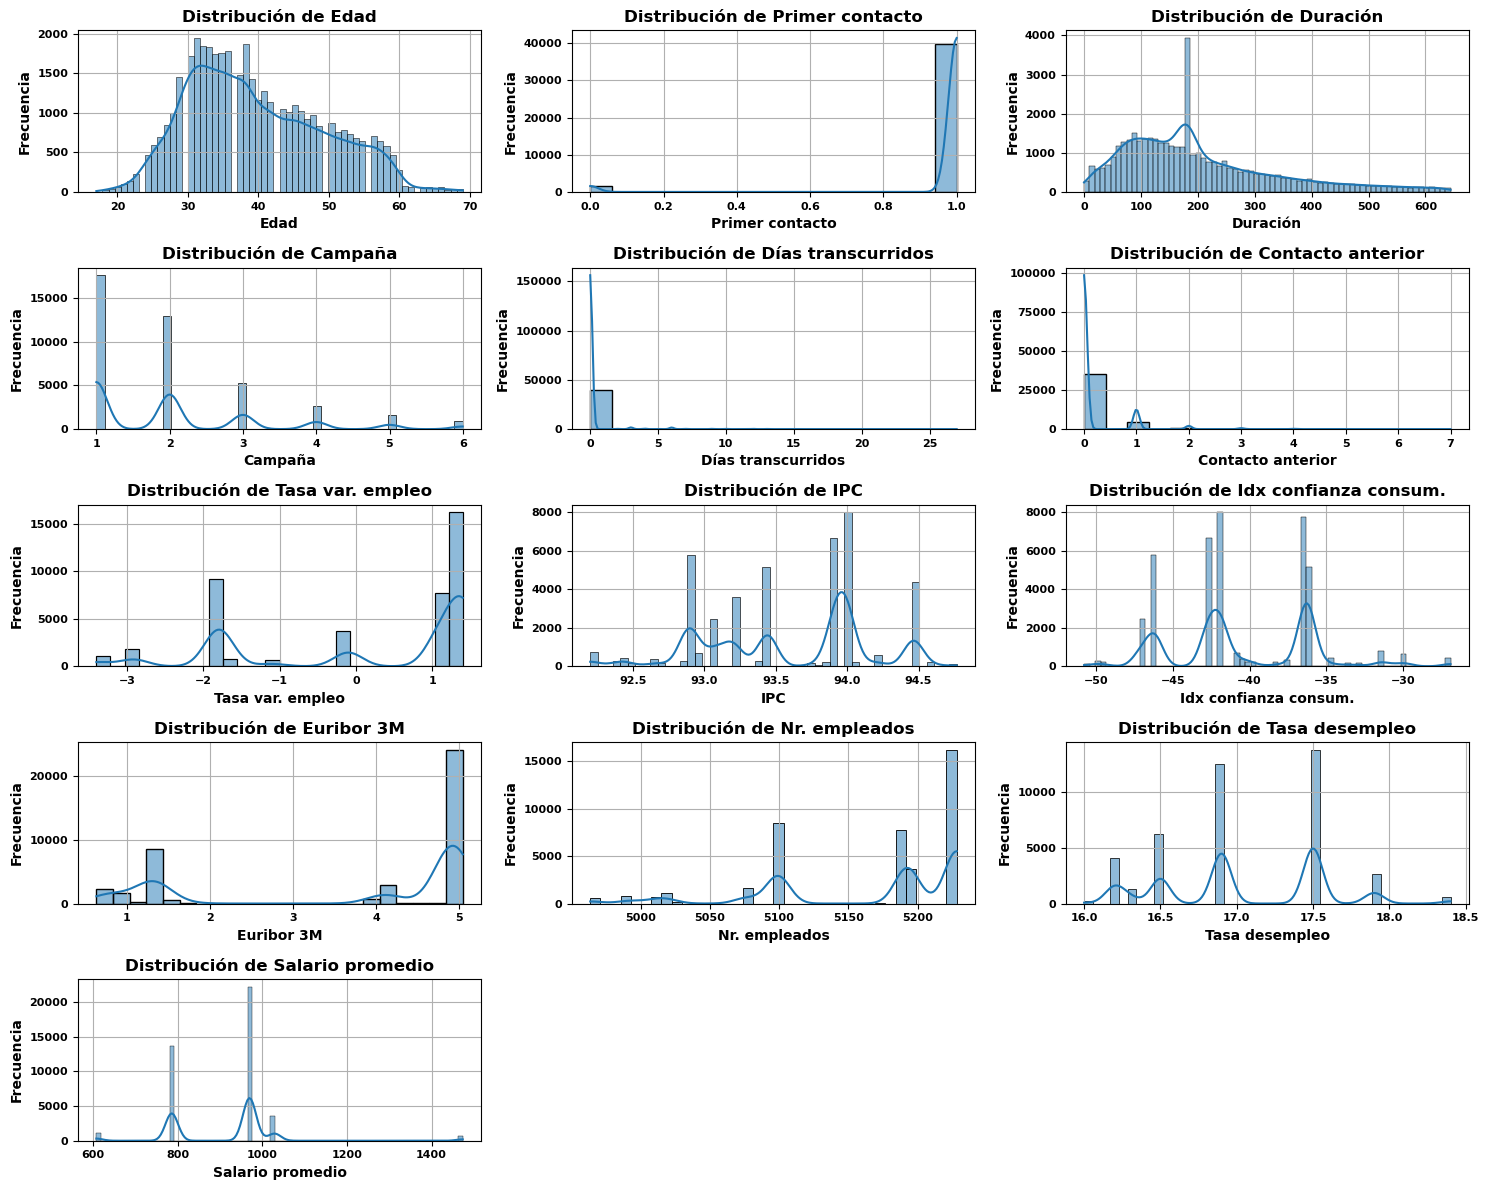

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))
cols = len(numeric_columns)
num_cols = 3
num_rows = round(cols/num_cols)+1
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i+1)  
    plt.title(f"Distribución de {col}")
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)  
    plt.ylabel('Frecuencia')  
    plt.xticks(fontsize=8)  
    plt.yticks(fontsize=8)  
    plt.grid(True)  

plt.tight_layout()  
plt.show()

Se puede observar que: 
* La distribución de la "Edad" esta levemente tendiendo a normal. 
* La distribución de "Duración" aún tiene un sesgo a derecha muy pronunciado y un pico importante en 180 debido a la aplicación de la mediana en el tratamiento de outliers.
* Las distribuciones de "Días transcurridos" y "Contacto anterior" muestrar que su valor mas frecuente esta en 0, generando un sesgo a derecha.
* La distribución de "Campaña" muestra que el primer y segundo contacto son los valores predominantes.
* En cuanto a "Tasa de desempleo" y "Salario promedio" también tienen un sesgo a derecha.

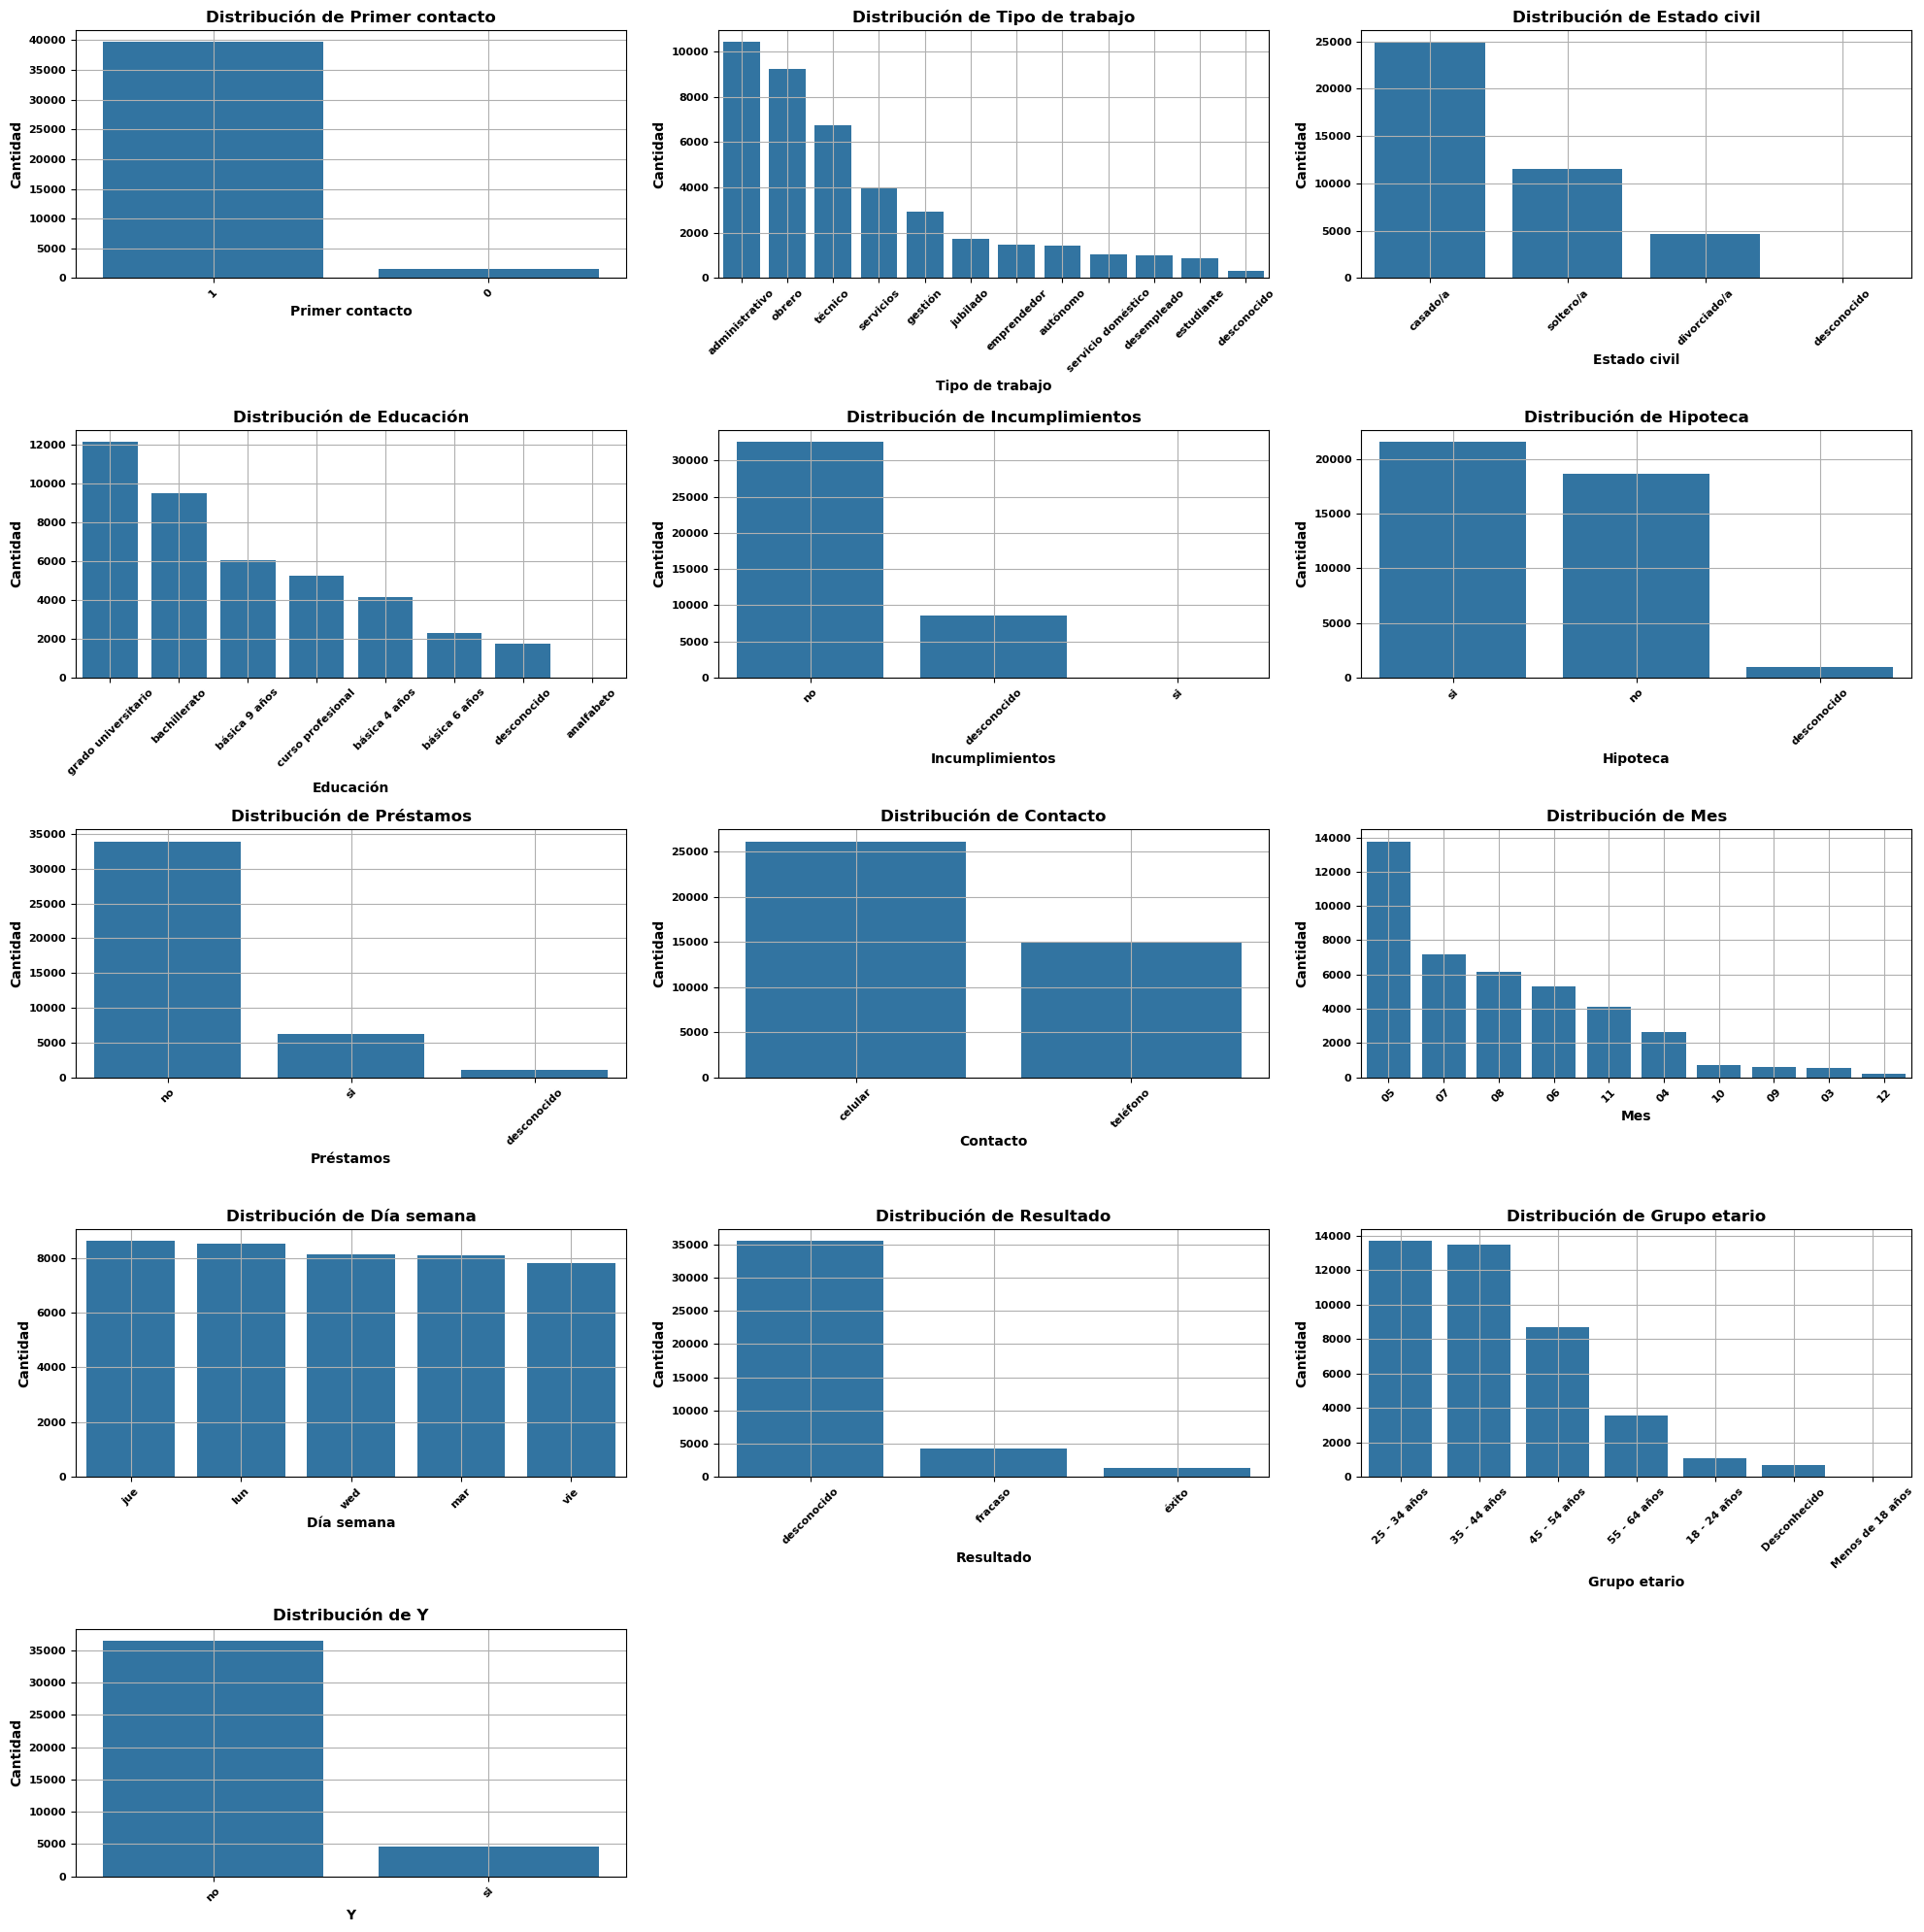

In [64]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

binary_numeric_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                          if df[col].dropna().isin([0, 1]).all()]

categorical_columns = binary_numeric_columns + categorical_columns

plt.figure(figsize=(20, 20))
cols = len(categorical_columns)
num_cols = 3
num_rows = round(cols/num_cols)+1
for i, col in enumerate(categorical_columns):
    plt.subplot(num_rows, num_cols, i+1)  
    plt.title(f"Distribución de {col}")
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)  
    plt.ylabel('Cantidad')
    plt.xticks(fontsize=8)  
    plt.yticks(fontsize=8)
    plt.xticks(rotation=45)  
    plt.grid(True)  

plt.tight_layout()  
plt.show()

En cuanto a las variables categóricas podemos ver que:
* En "Primer contacto" muestra que casi en su totalidad los valores representan al primer contacto de un cliente.
* Para el caso de "Tipo de trabajo" los valores que abarcan el mayor porcentaje son "administrativo", "obrero" y "técnico".
* En el caso de "Estado civil" el valor de Casado dobla al de soltero.
* En cuanto a "Educación" los niveles mas predominantes son el grado universitario y bachillerato, analfabetos no se muestran.
* En cuanto a "Incumplimientos" la gran mayoría no presenta, sin embargo la gran mayoría tampoco tiene préstamos.
* Para el caso de "Hipotecas" se ve distribuido en casi un 50%.
* El medio de contacto mas frecuente fue el celular, casi doblando al teléfono fijo.
* El mes mas fuerte de la campaña fue en mayo, en cuanto a los días se realizó parejo de Lunes a Viernes.
* En cuanto a los resultados, el "Resultado" que indica resultados de una campaña anterior el dato mas frecuente es "desconocido", con lo cual resulta dificil un seguimiento. 
* Finalmente para la variable target "Y" alrededor de un 80% indica que no suscribiría a un plazo fijo.

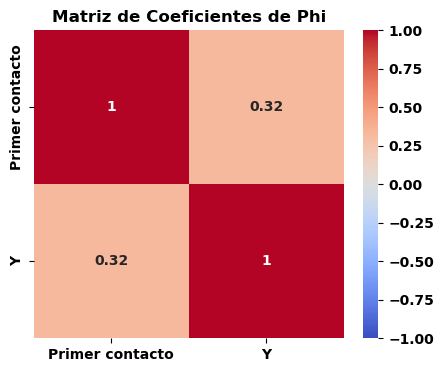

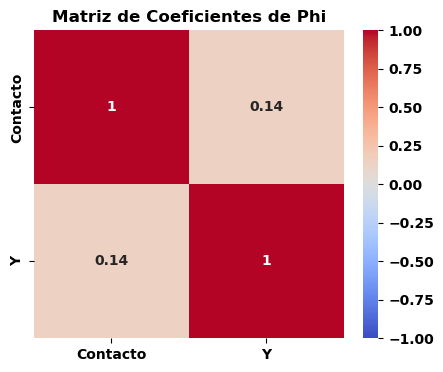

In [65]:
from scipy.stats import chi2_contingency

categorical_columns = df[[Col.FIRST_CONTACT,Col.CONTACT]].columns

for col in categorical_columns:
    col1=col
    col2=Col.Y

    contingency_table = pd.crosstab(df[col1], df[col2])

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    phi_coefficient = np.sqrt(chi2 / df.shape[0])

    cols = [col1, col2]  
    phi_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)

    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                table = pd.crosstab(df[cols[i]], df[cols[j]])
                chi2, p, dof, expected = chi2_contingency(table)
                phi_matrix.iloc[i, j] = np.sqrt(chi2 / df.shape[0])
            else:
                phi_matrix.iloc[i, j] = 1 

    # Crear el heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(phi_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Matriz de Coeficientes de Phi')
    plt.show()

No se encuentra ninguna relación clara entre la variable target y las columnas categóricas "Primer Contacto" y "Contacto".

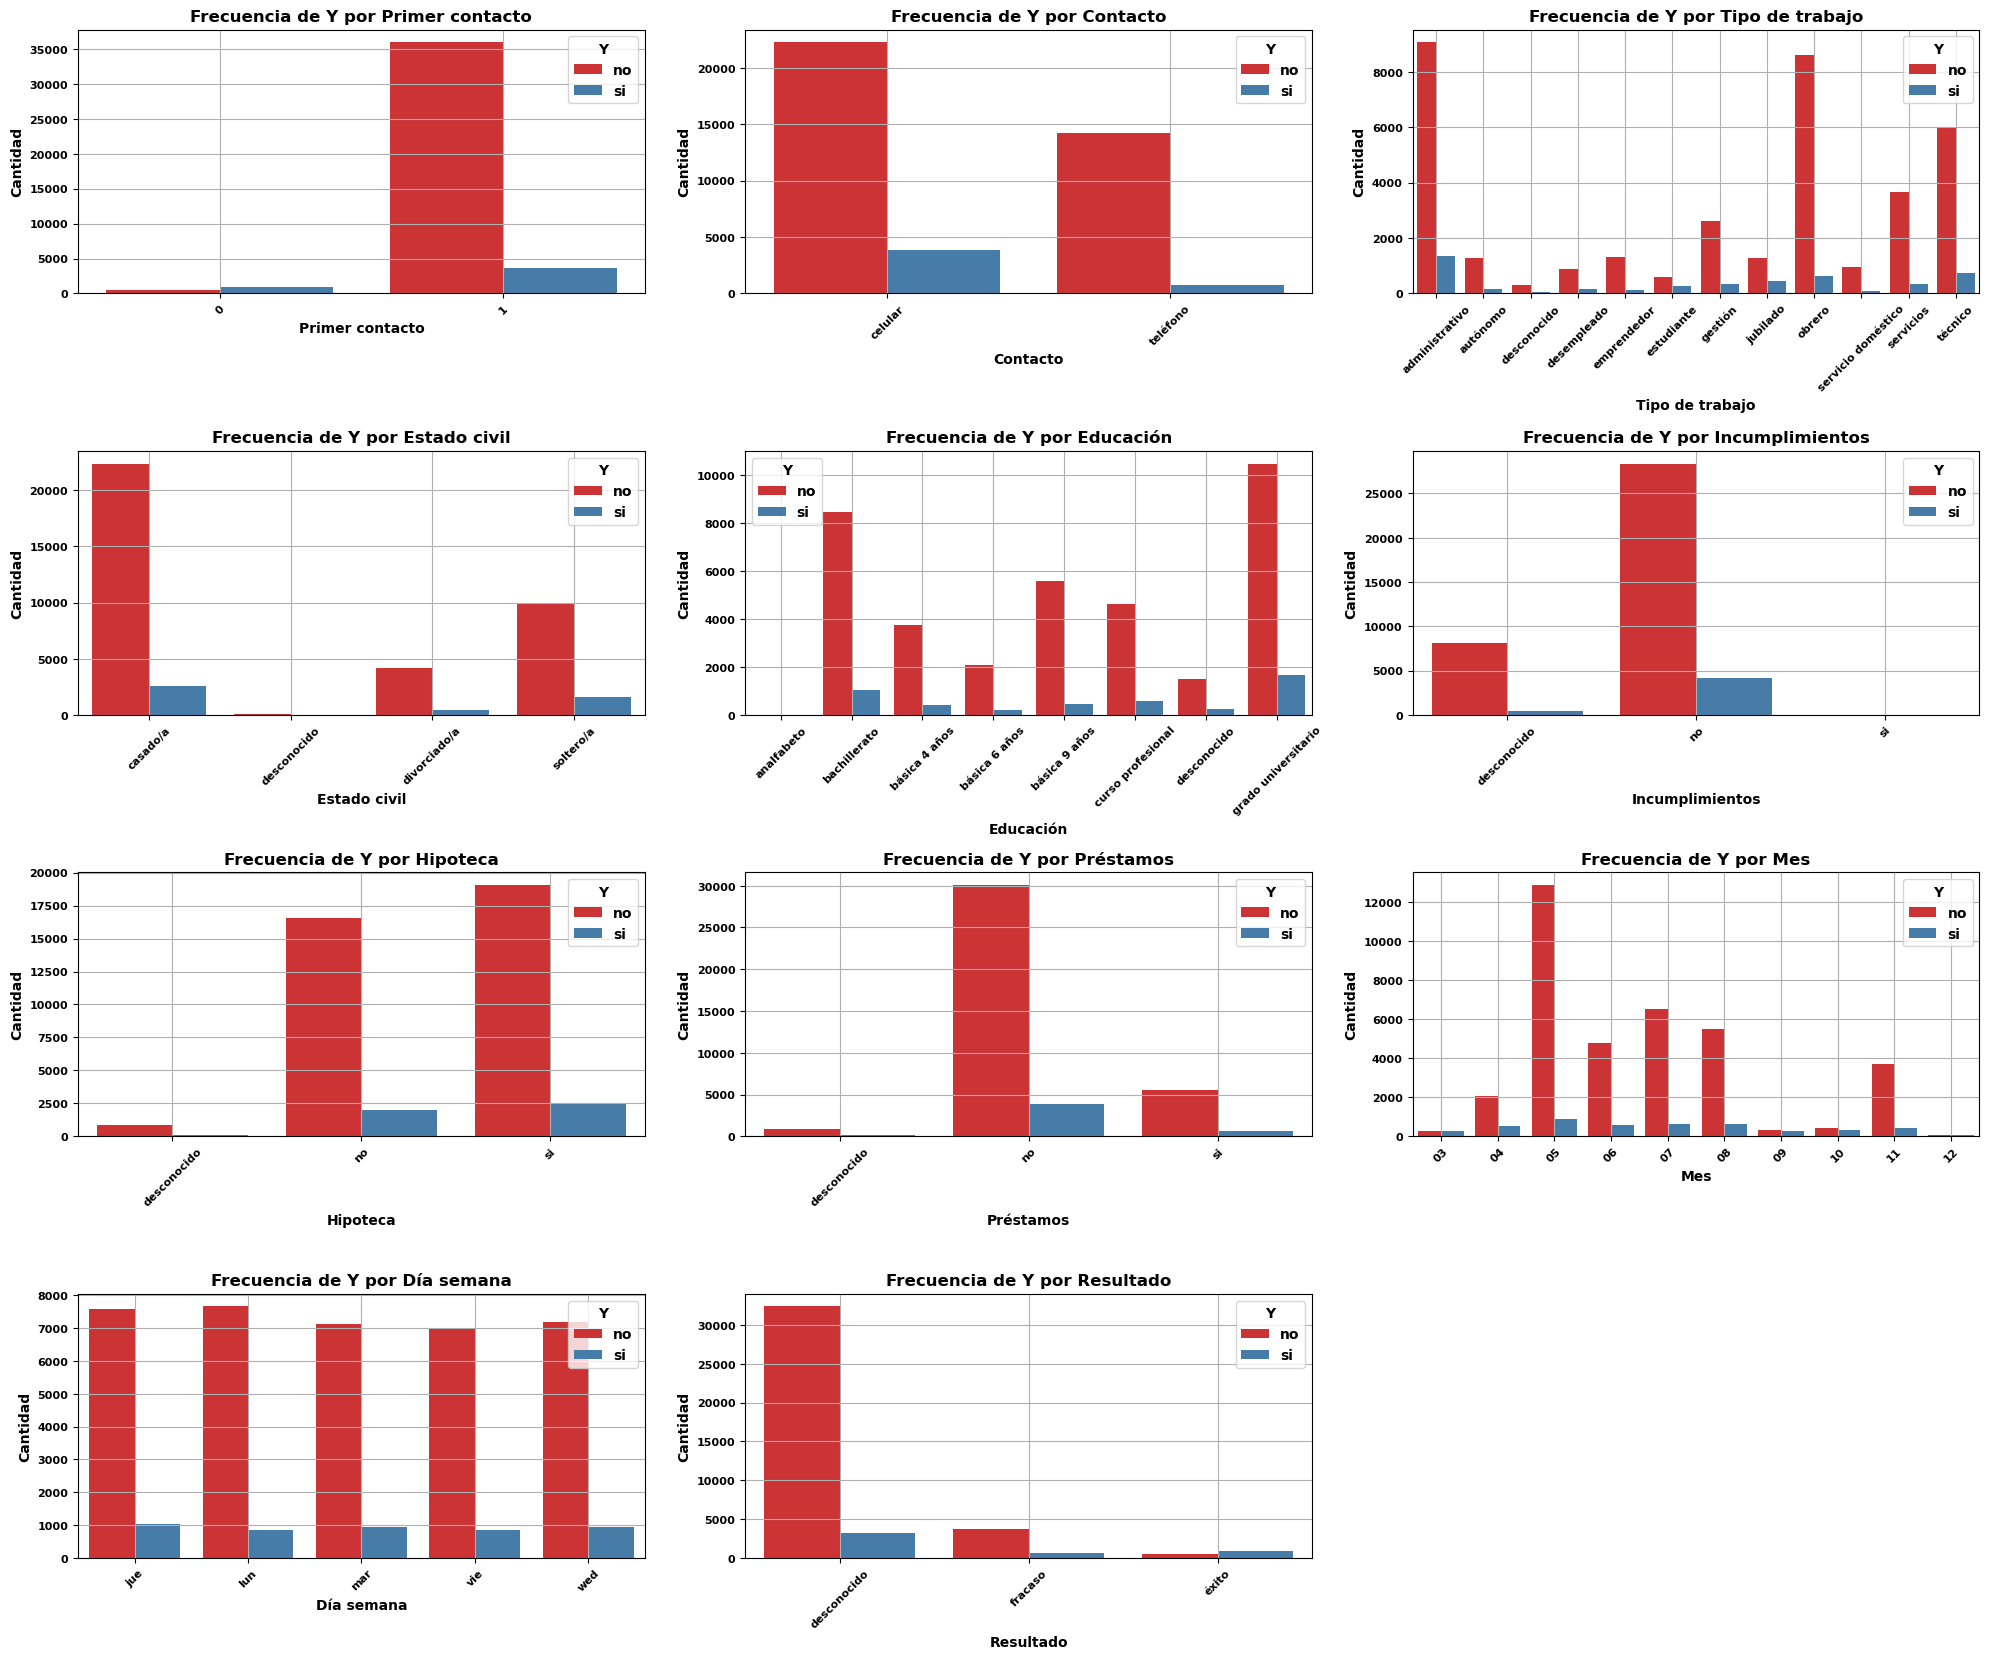

In [66]:
categorical_columns = df[[Col.FIRST_CONTACT, Col.CONTACT,Col.JOB,Col.MARITAL,Col.EDUCATION,Col.DEFAULT,Col.HOUSING,Col.LOAN,Col.MONTH,Col.DAY_OF_WEEK,Col.POUTCOME]].columns

plt.figure(figsize=(20, 20))
cols = len(categorical_columns)
num_cols = 3
num_rows = round(cols/num_cols)+1
for i, col in enumerate(categorical_columns):
    plt.subplot(num_rows, num_cols, i+1)  
    plt.title(f'Frecuencia de Y por {col}')
    contingency_table = pd.crosstab(df[col], df[Col.Y])
    contingency_long = contingency_table.reset_index().melt(id_vars=col, var_name='Y', value_name='Cantidad')
    sns.barplot(data=contingency_long, x=col, y='Cantidad', hue='Y', palette='Set1')
    
    plt.ylabel('Cantidad')
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)  
    plt.xticks(rotation=45)  
    plt.grid(True)  

plt.tight_layout()  
plt.show()


En general los gráficos presentan un mayor número de respuestas _no_ independientenmente de la variable categórica contra la que se analice. Sin embargo se puede observar que en cuanto a resultados de campañas anteriores, si el resultado de la campaña anterior fue éxito, la cantidad de respuestas por _si_ es mayor que las respuestas por _no_.

En los próximos gráficos, dada la cantidad de columnas, se analizará por cada variable categórica, la relación sumando las variables numéricas y la variable target.

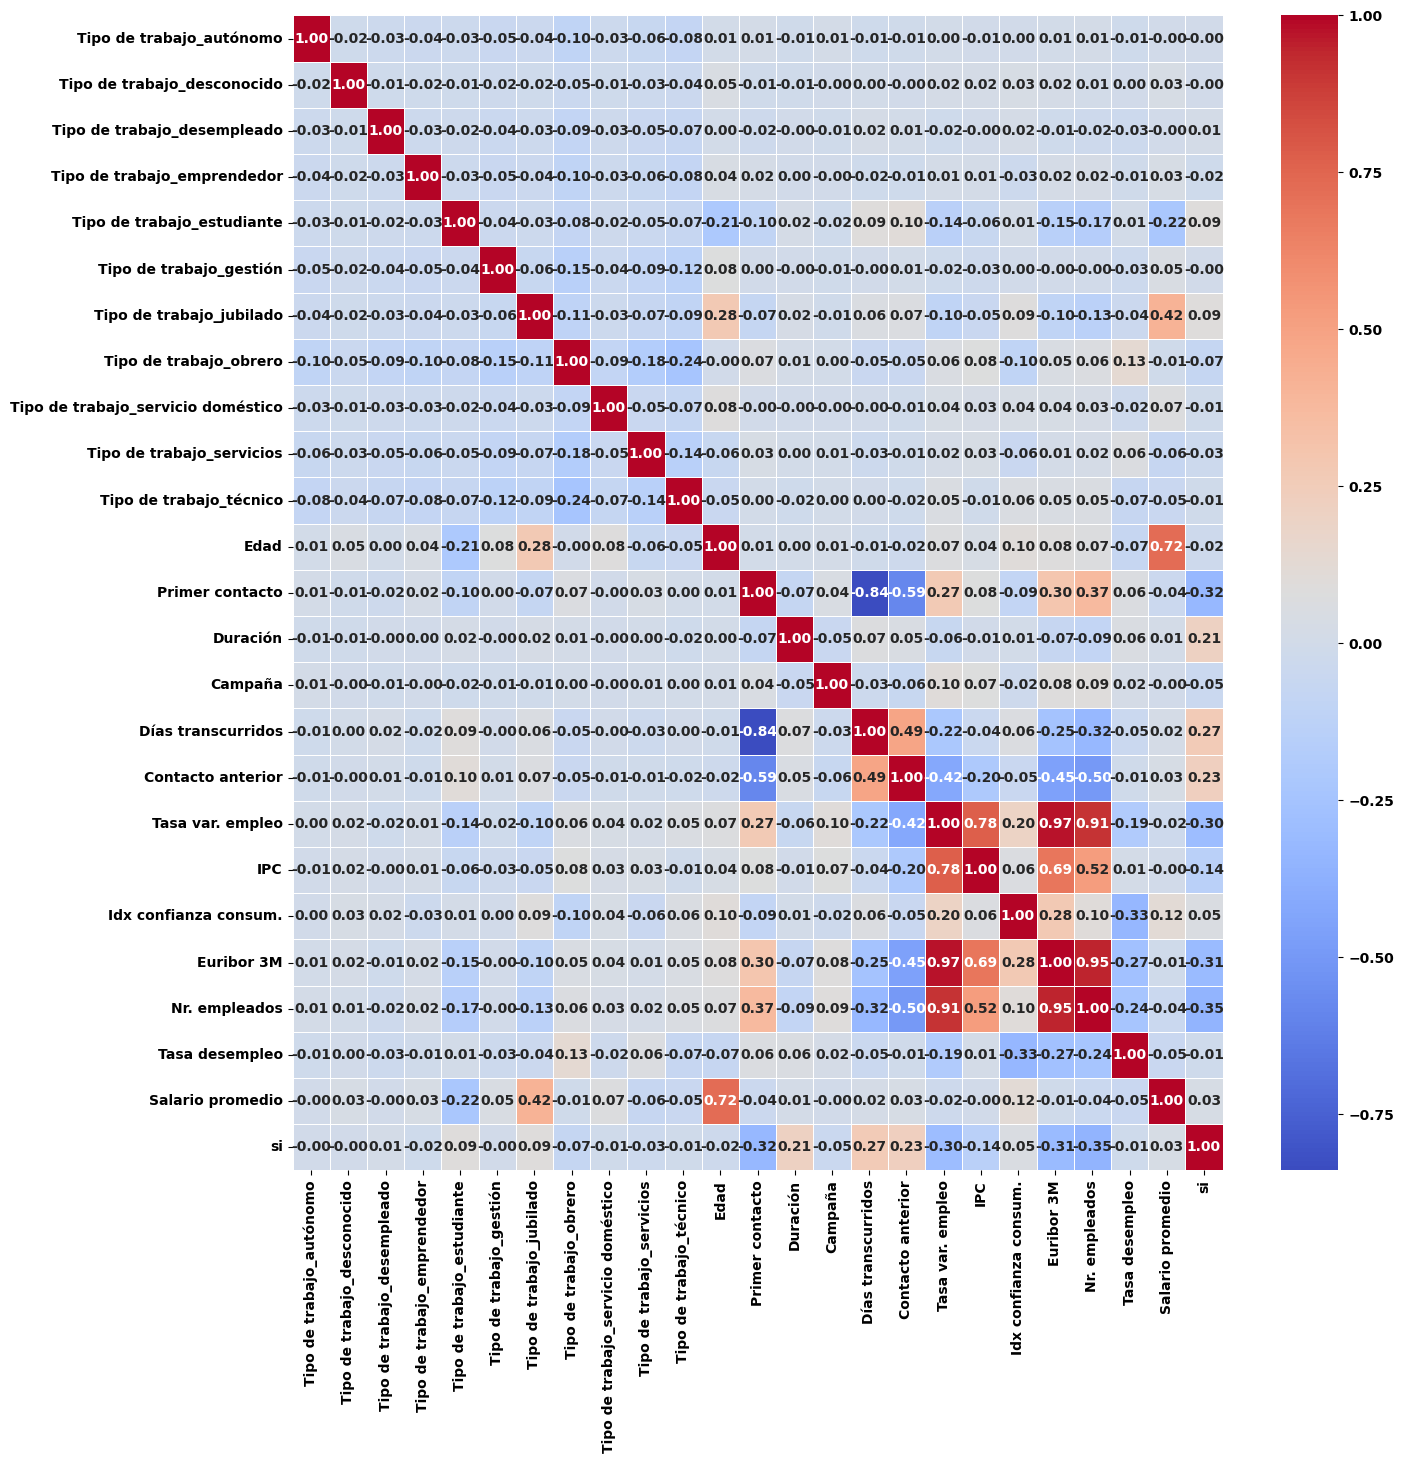

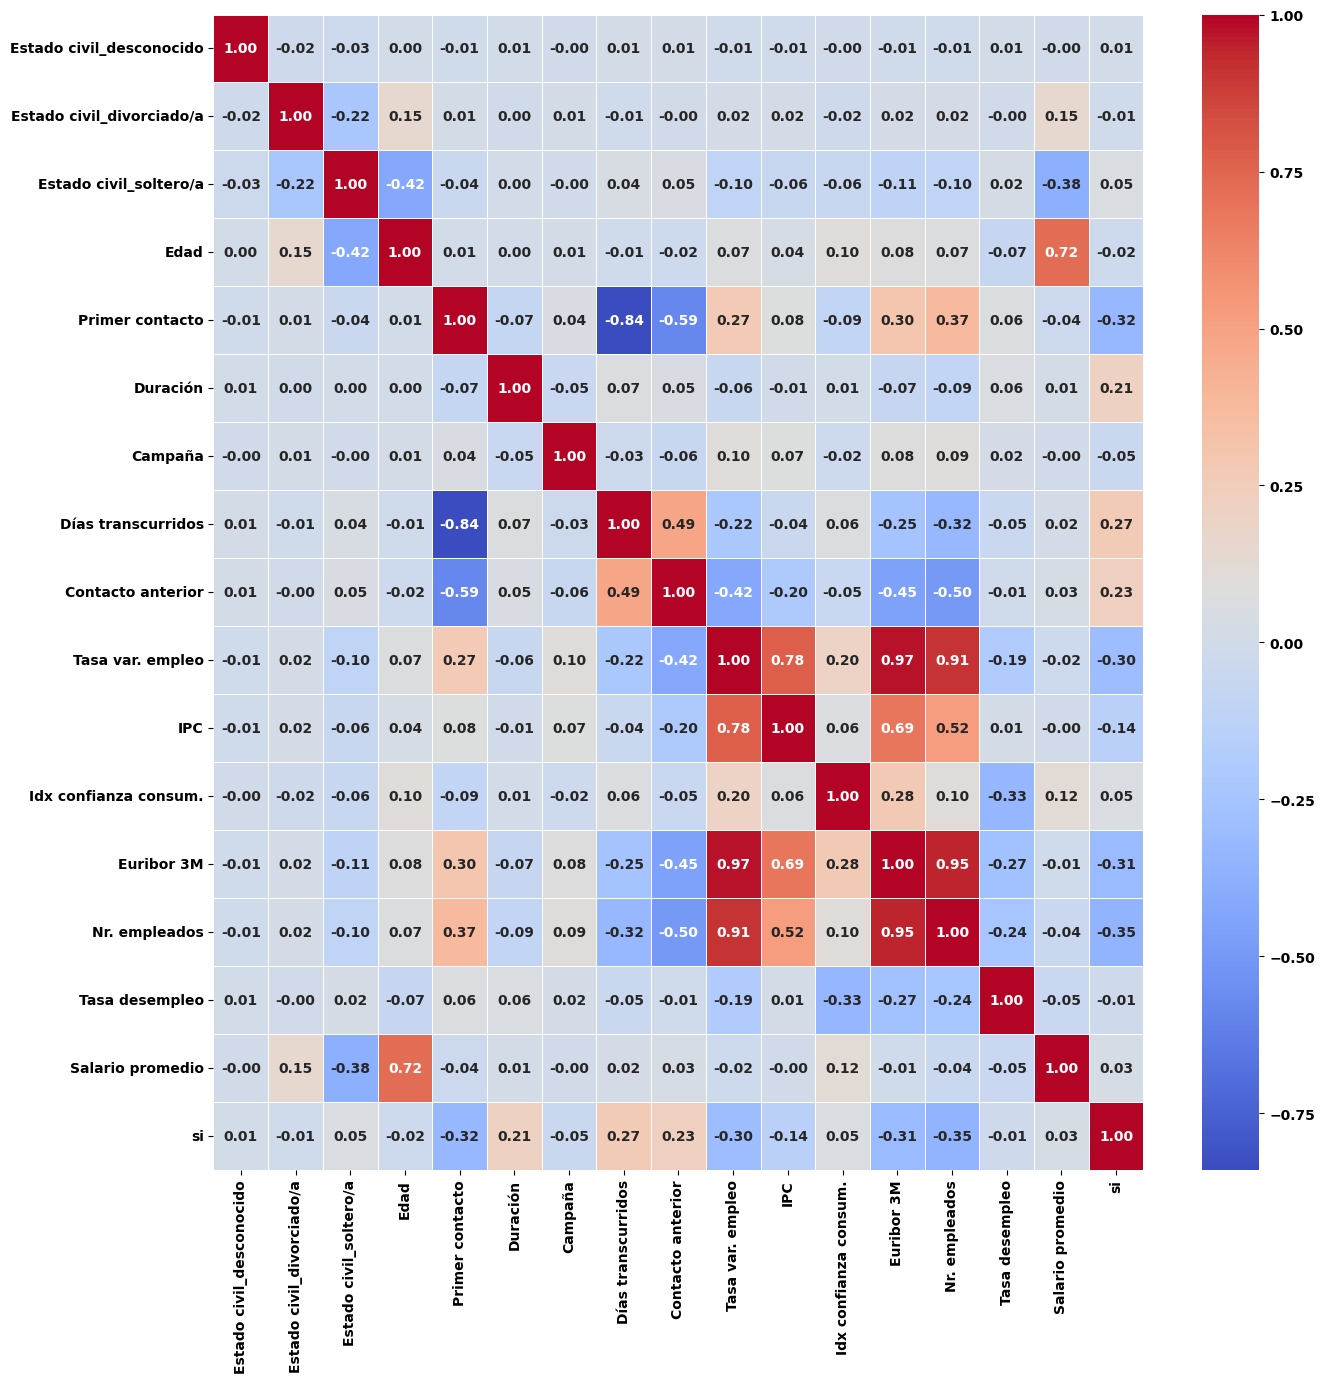

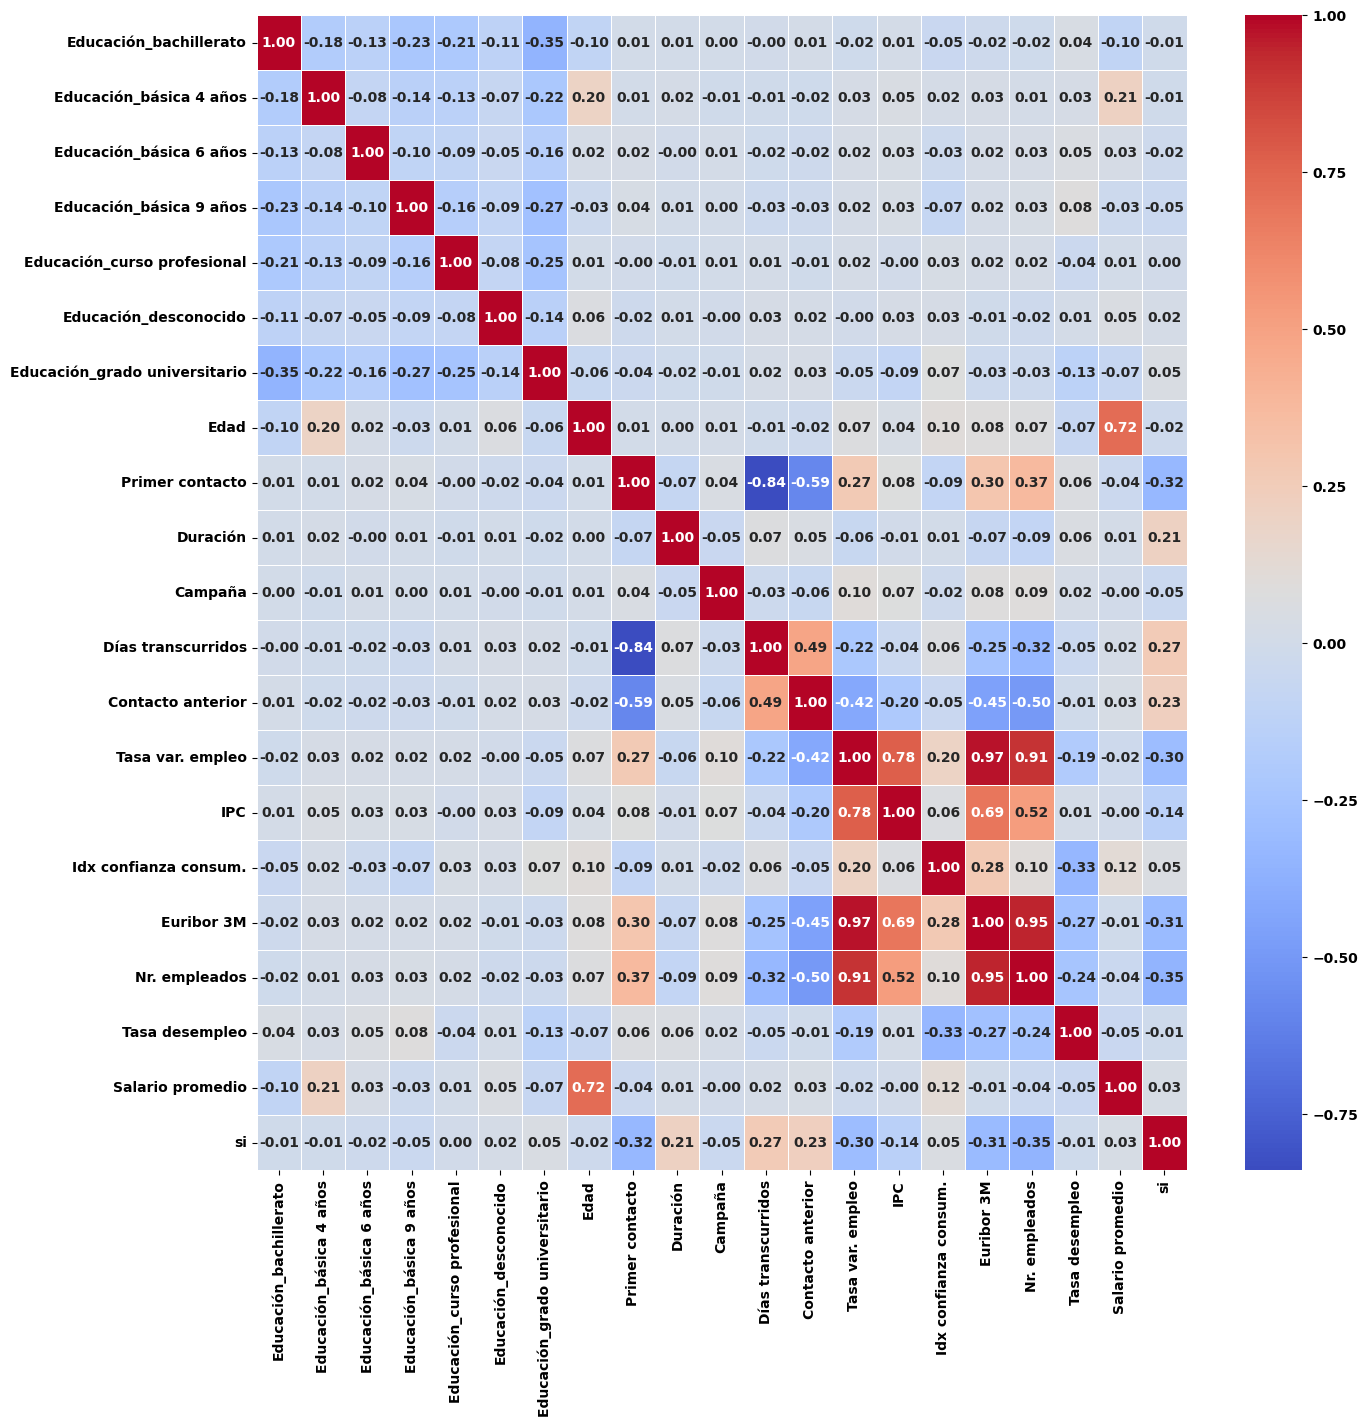

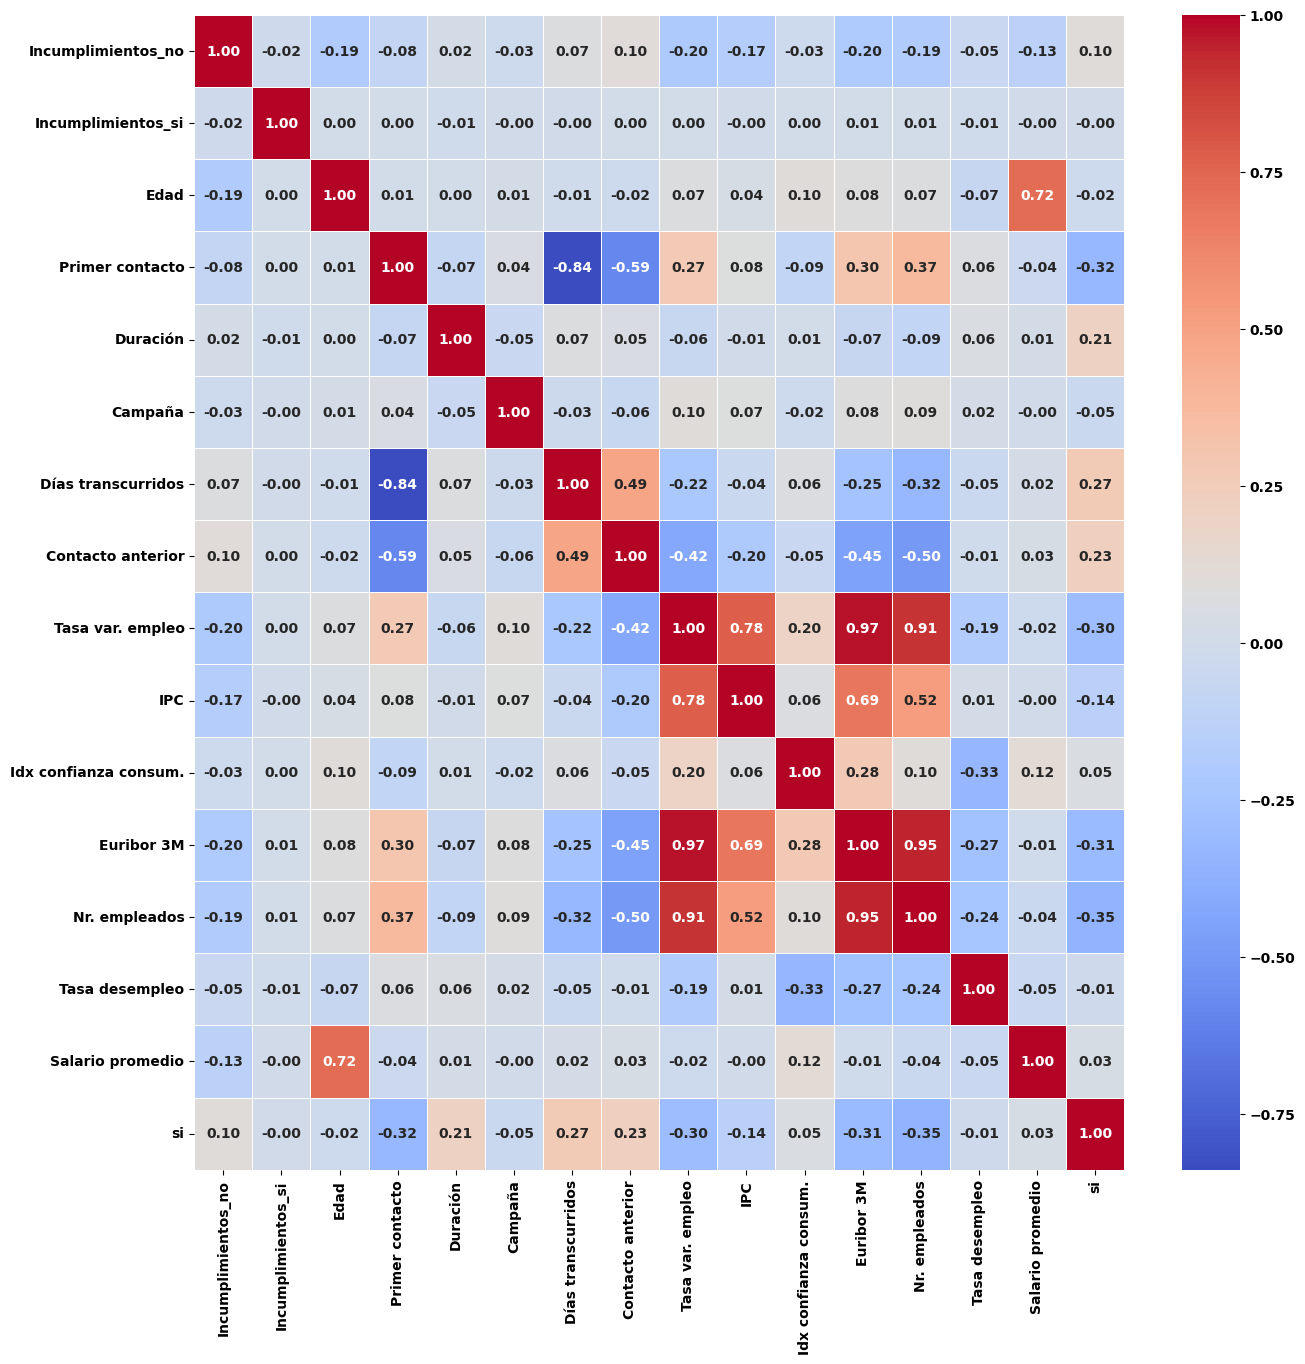

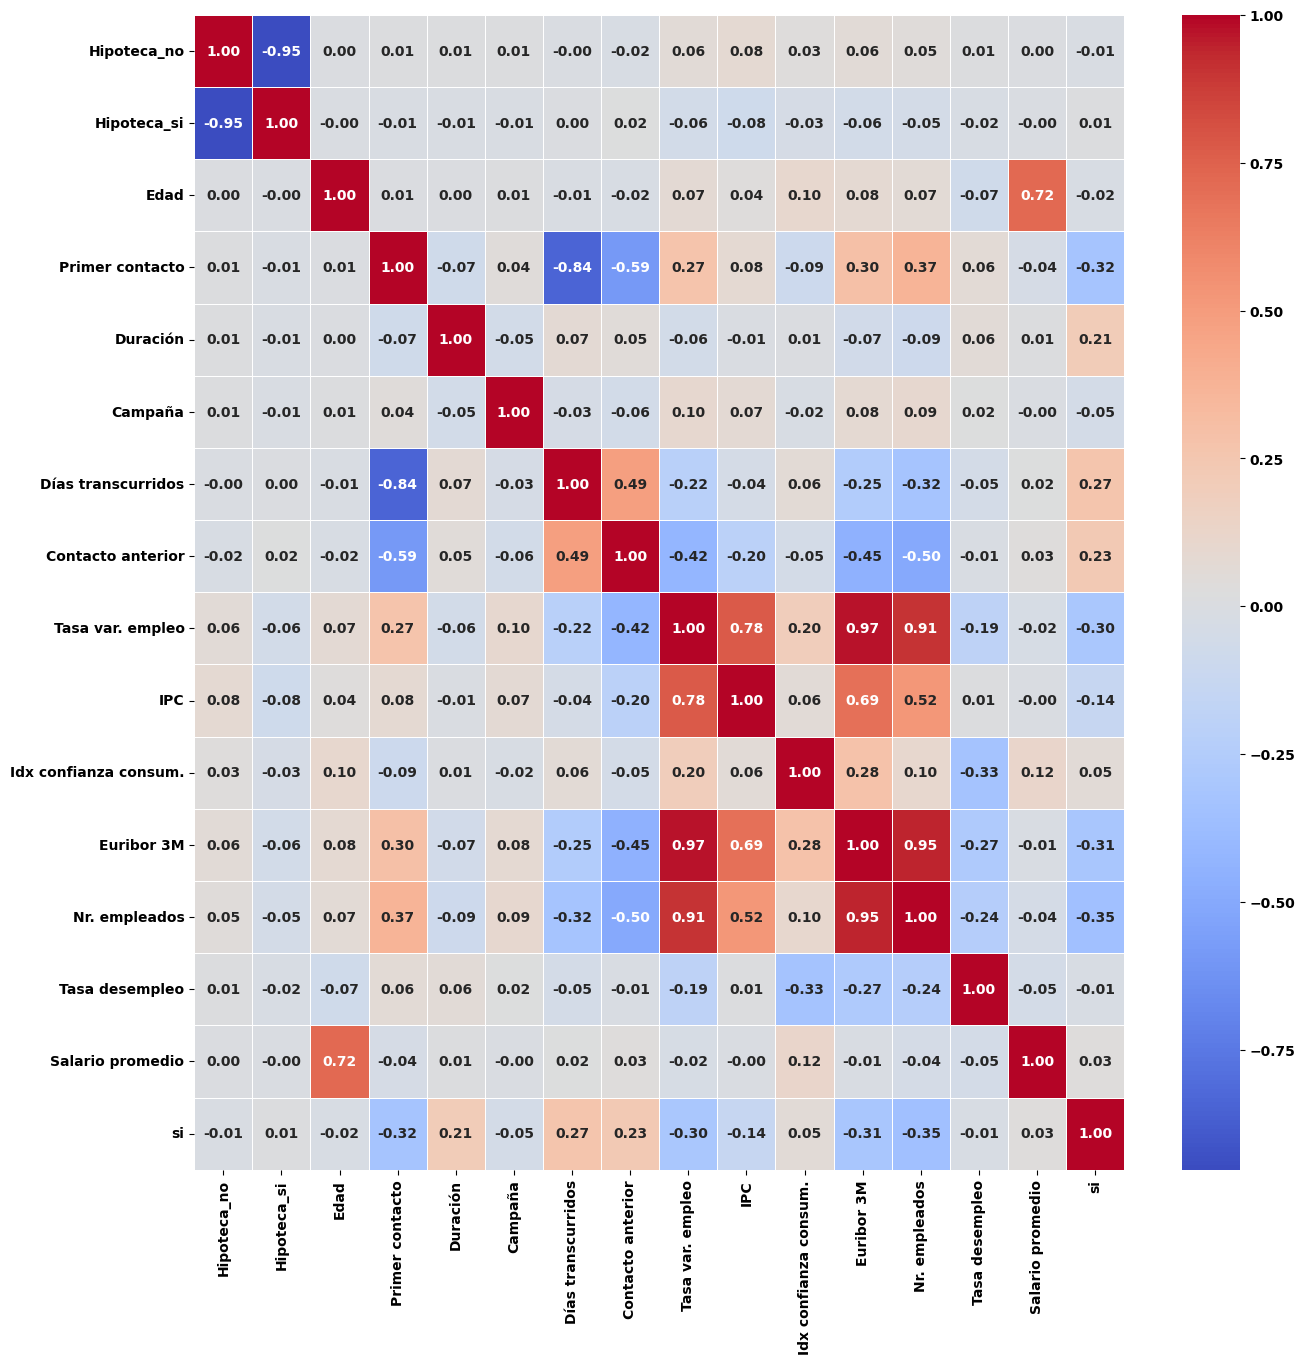

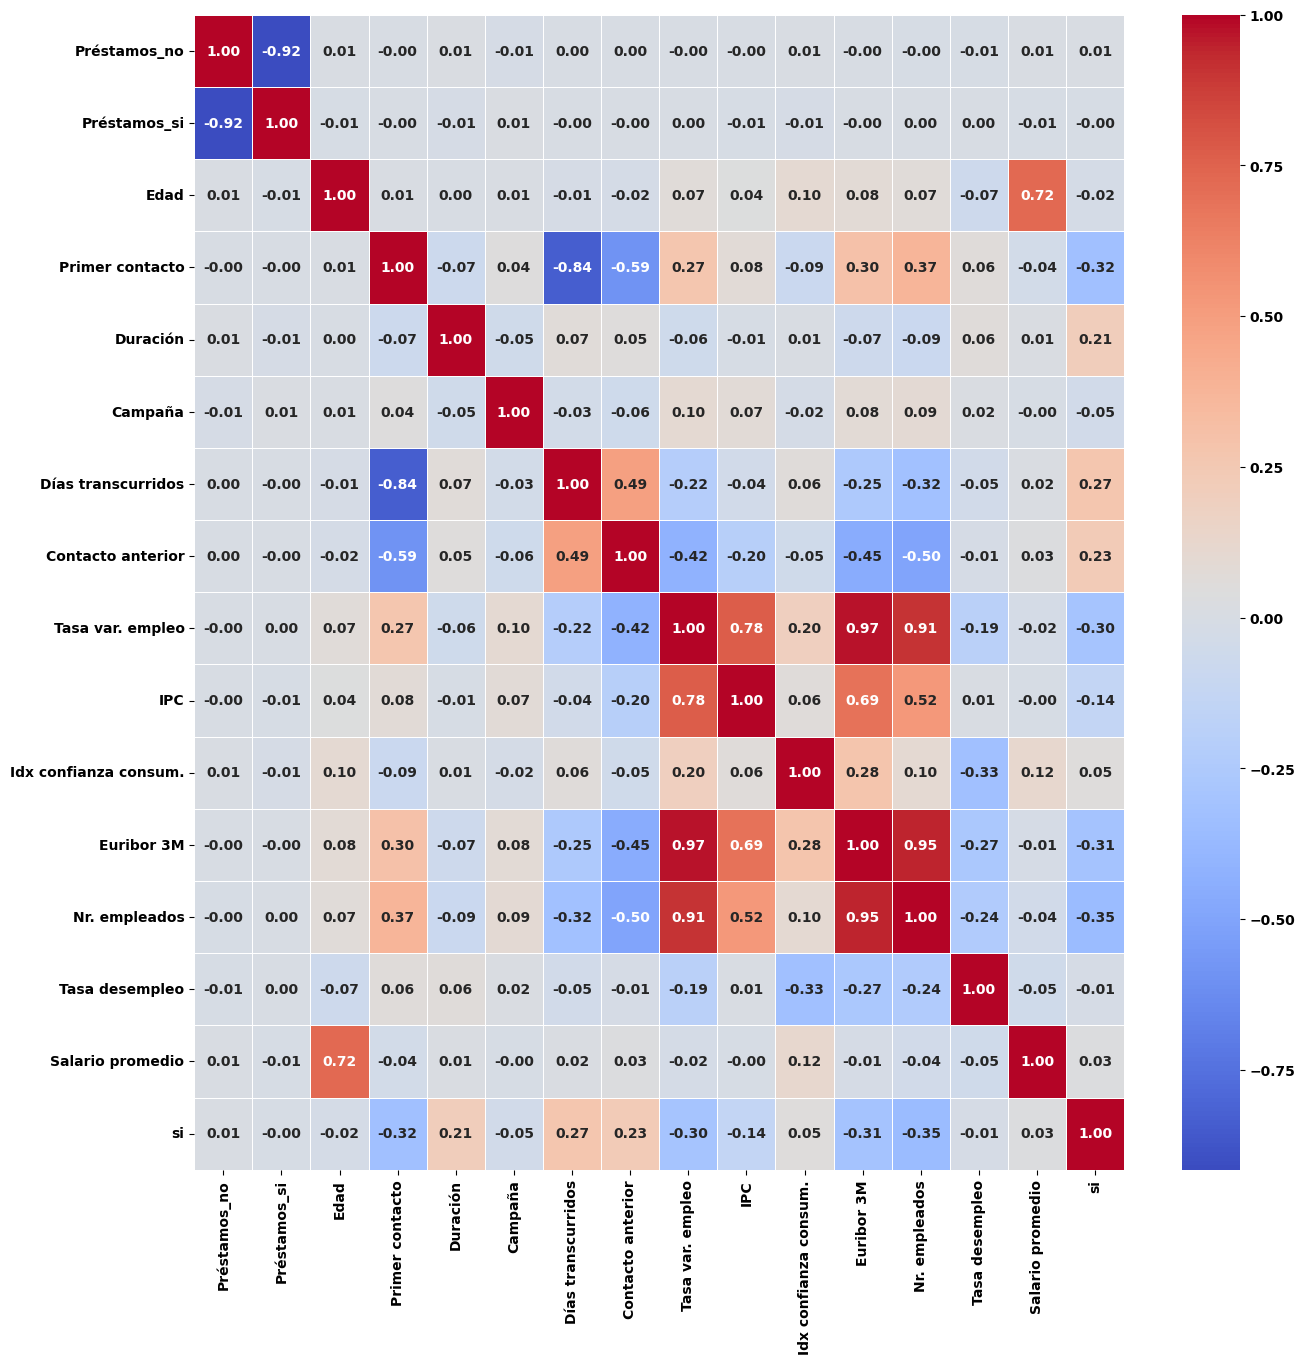

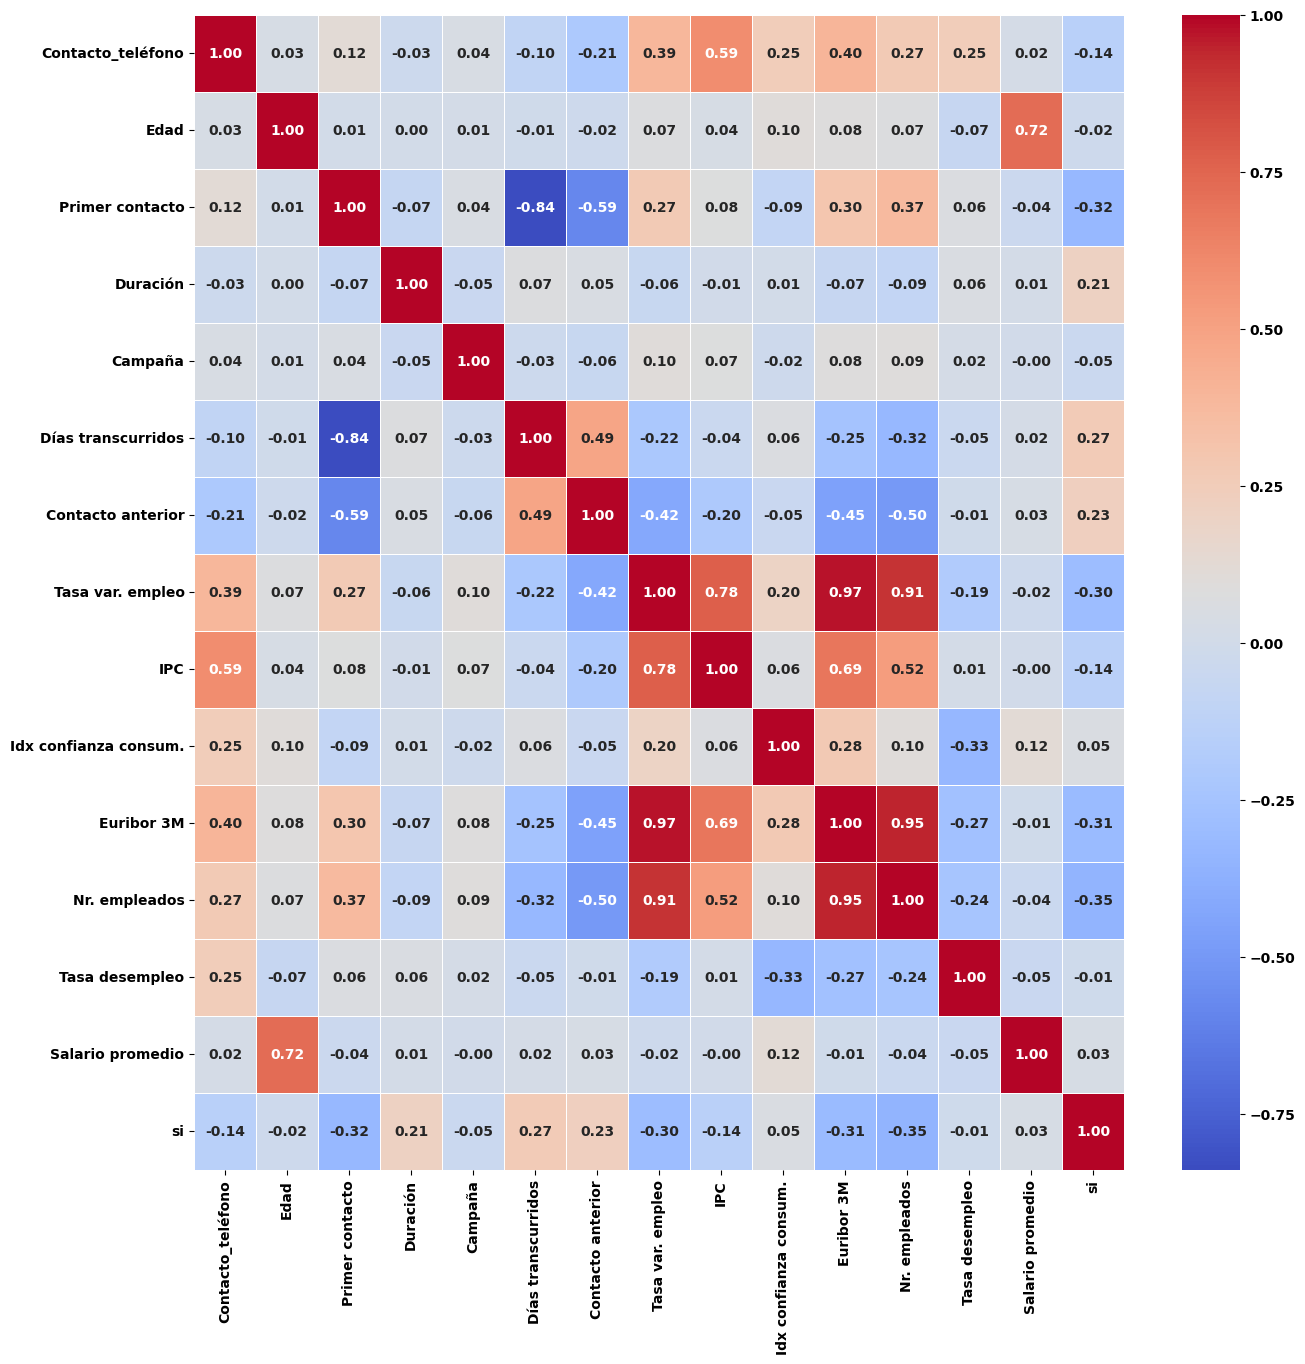

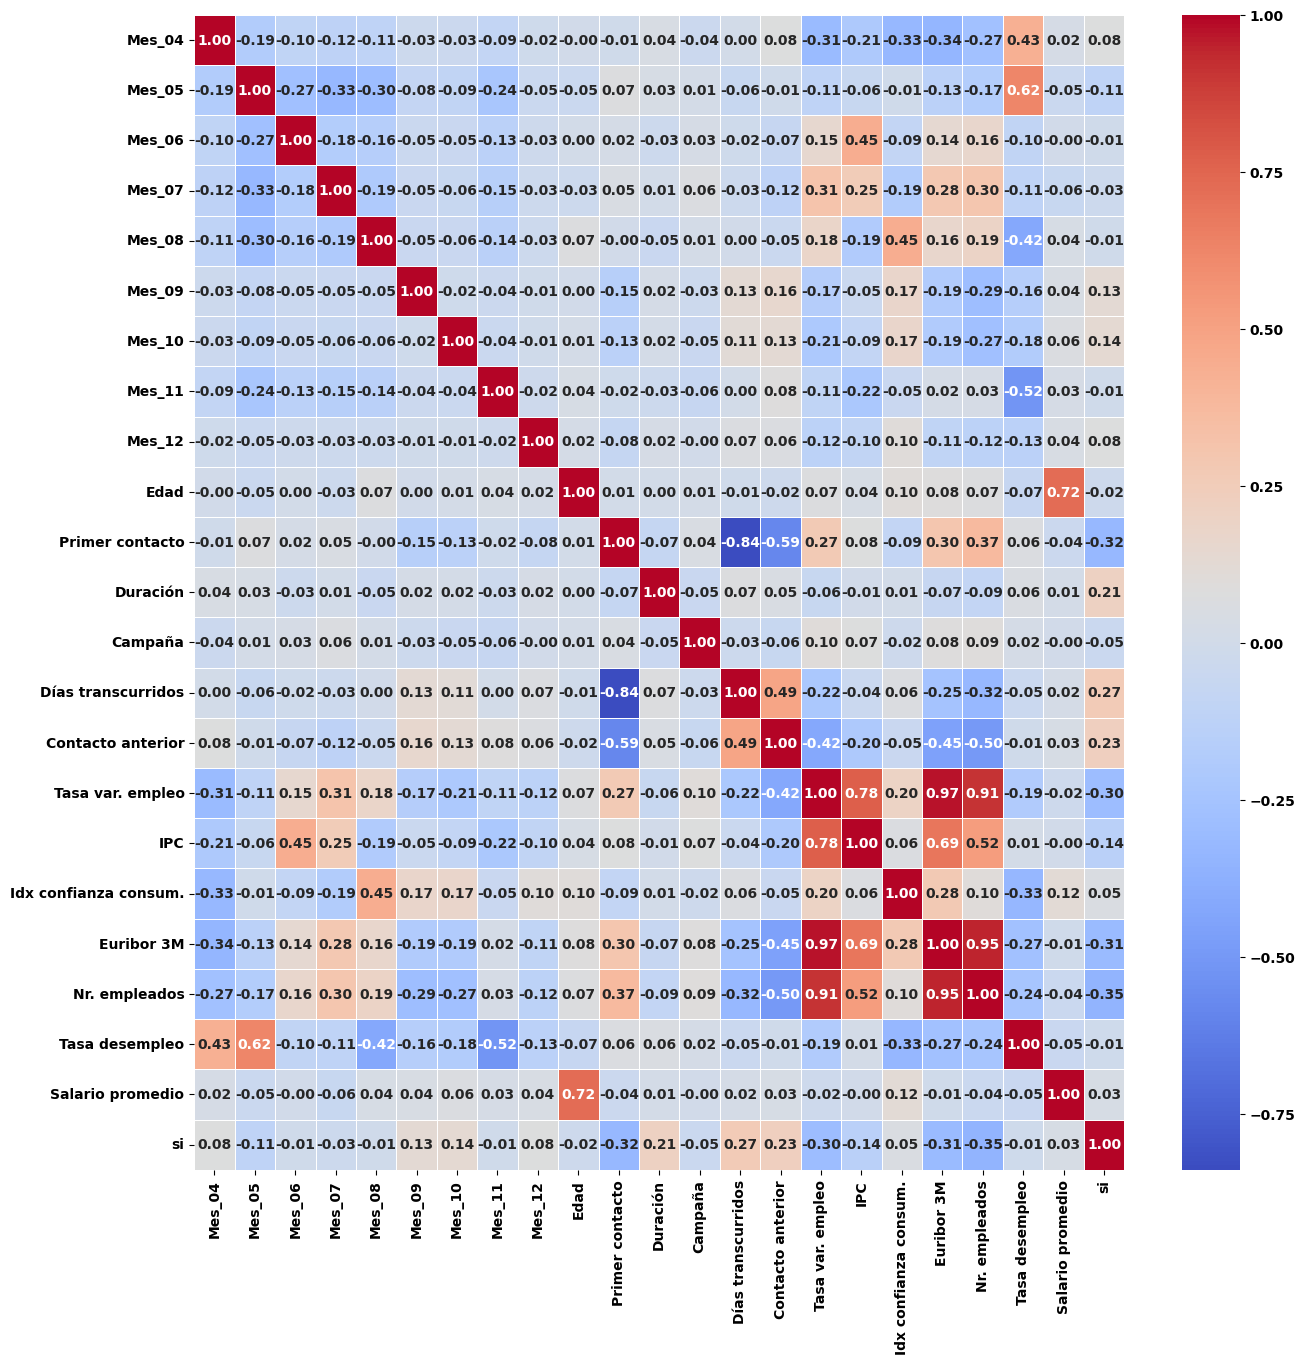

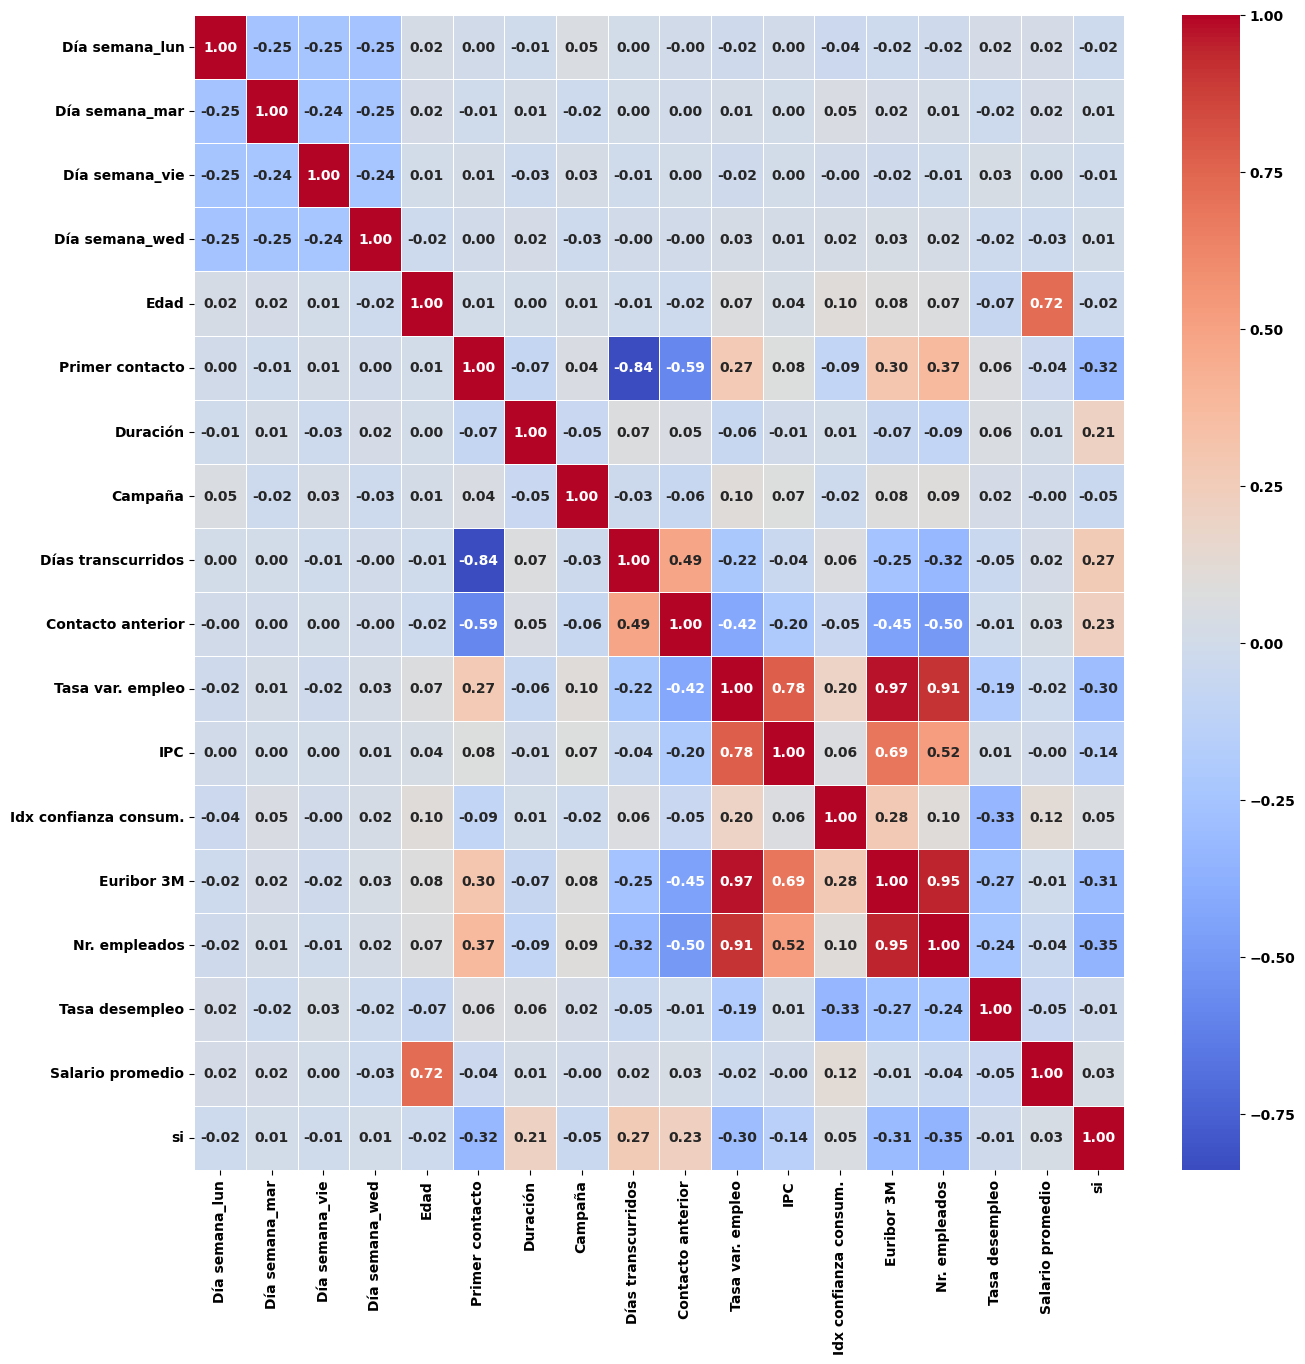

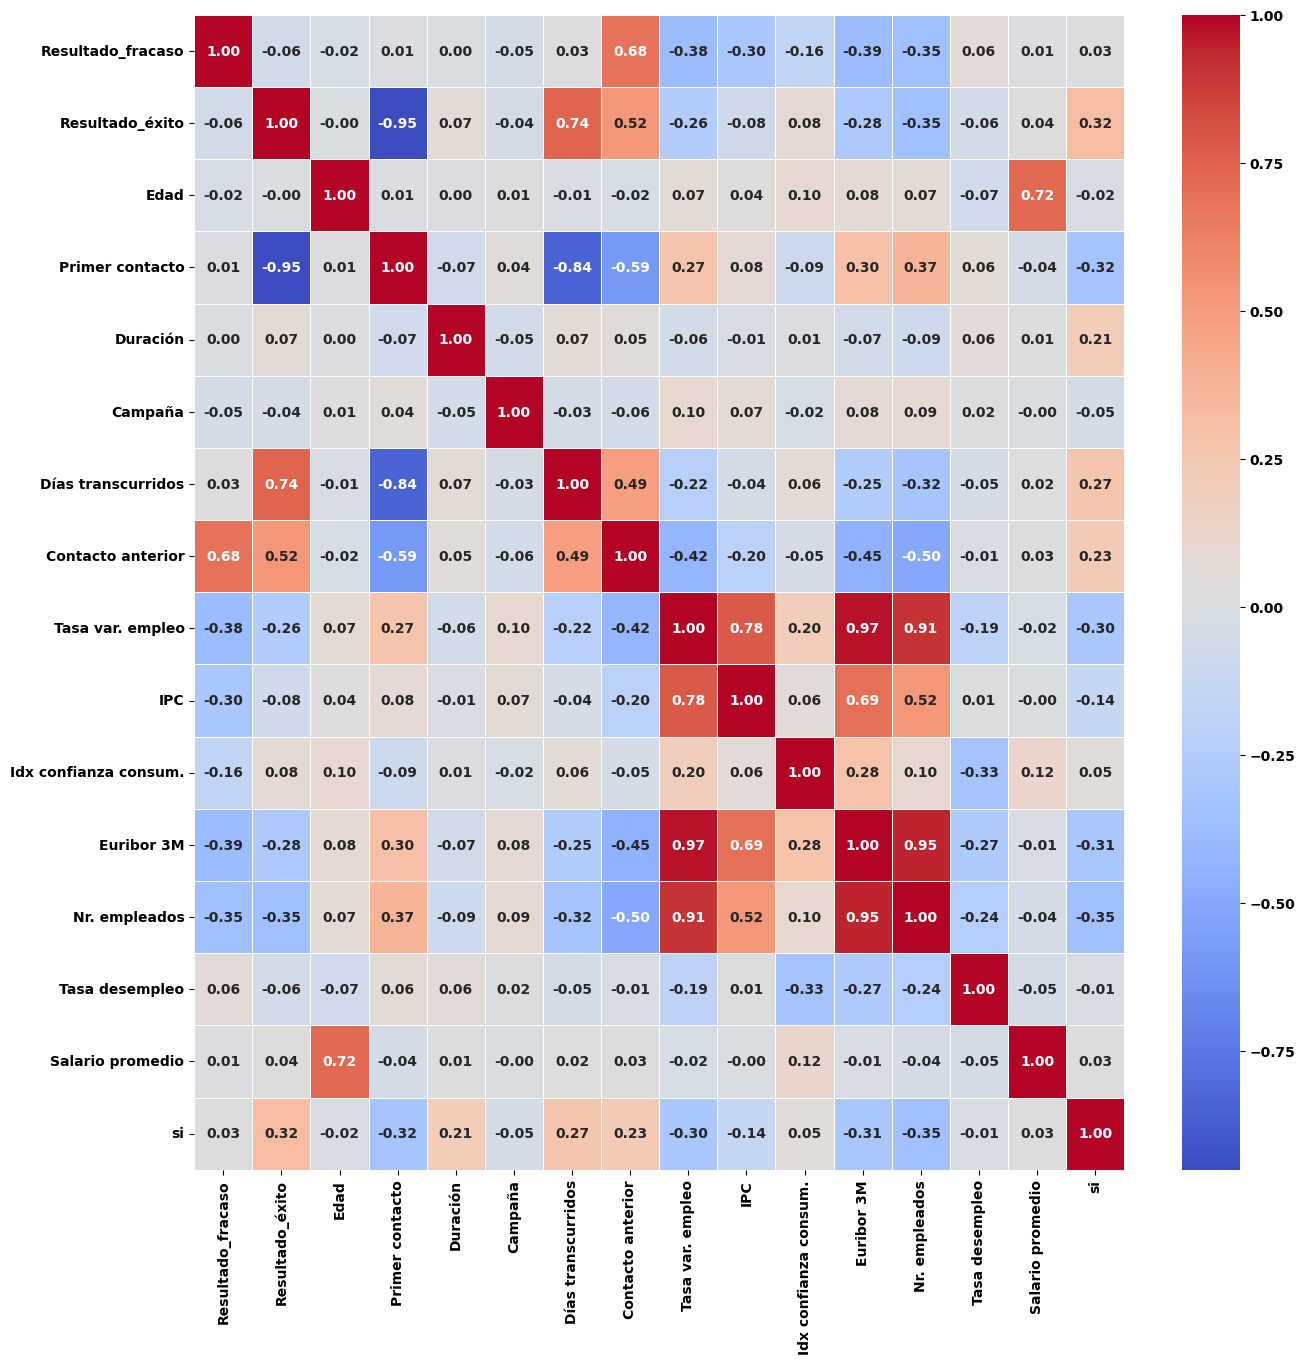

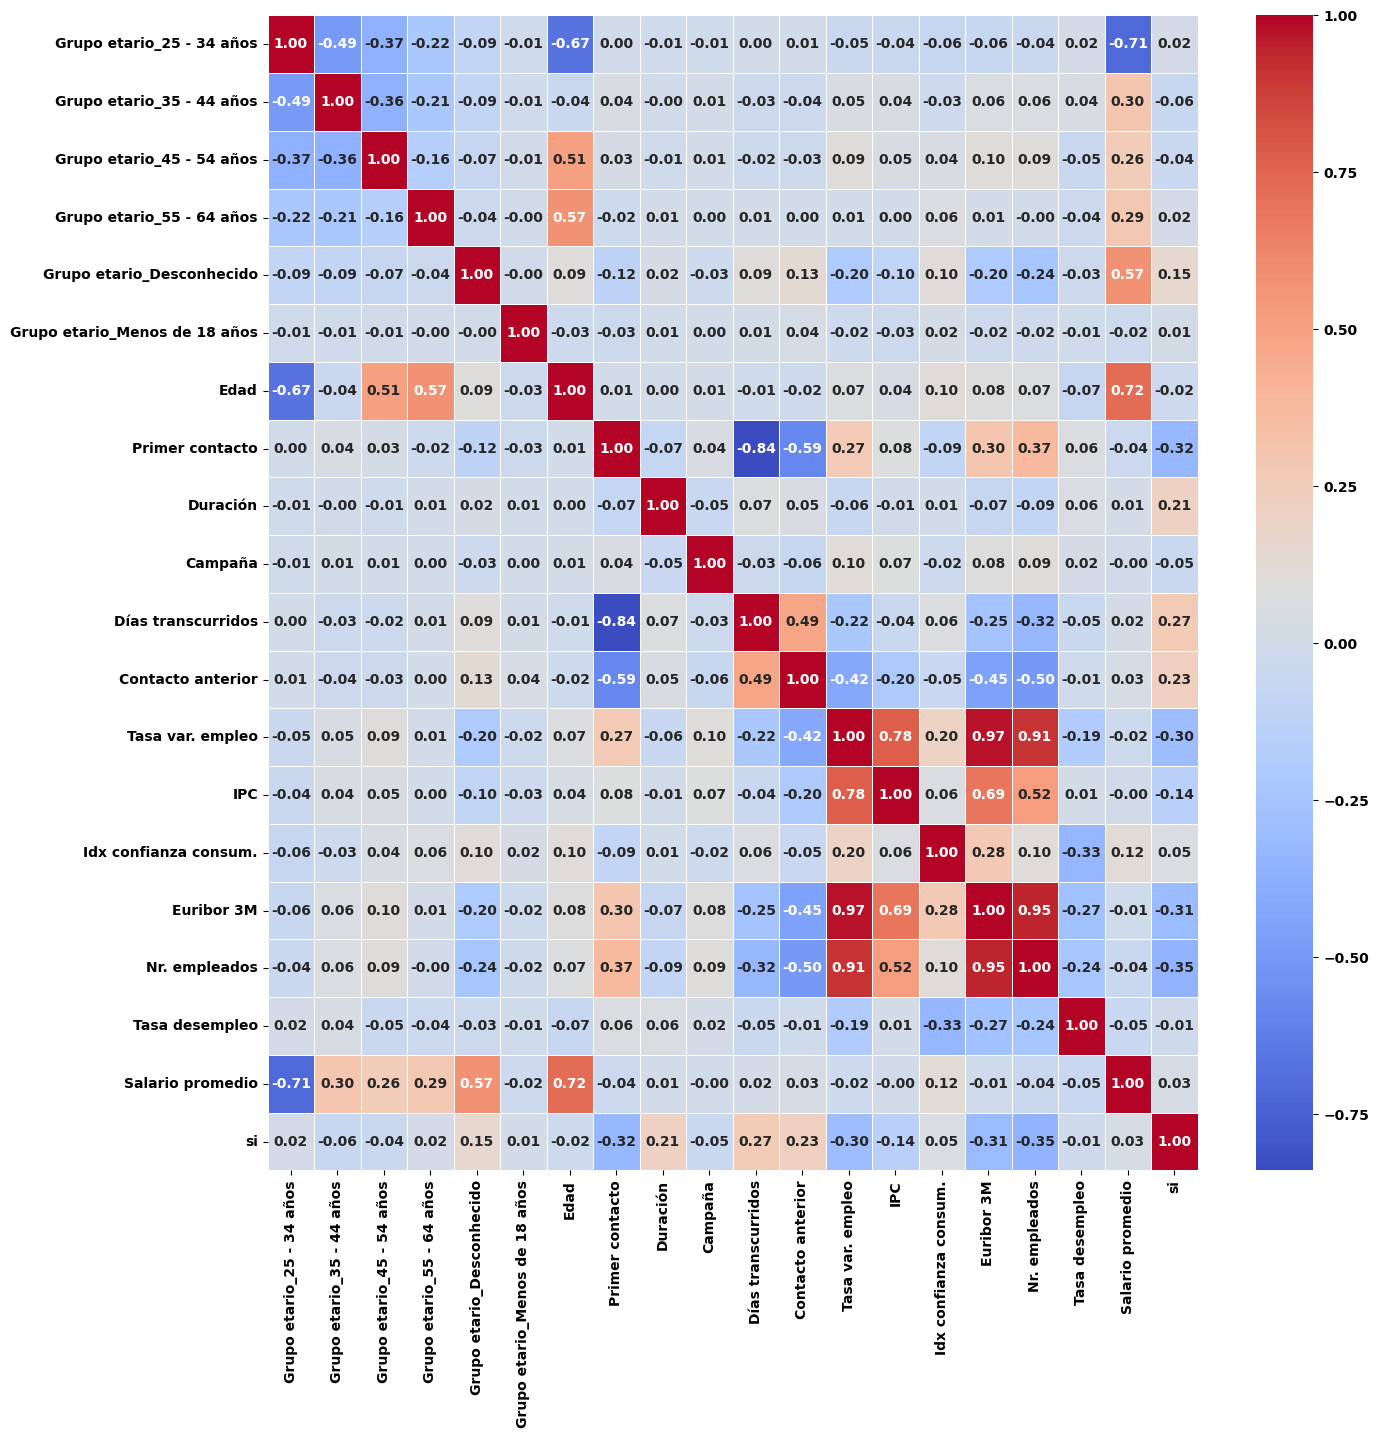

In [67]:
cat_columns = df.select_dtypes(['object']).columns
cat_columns = cat_columns.drop(Col.Y)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

y_encoded = pd.get_dummies(df[Col.Y], columns=[Col.Y], drop_first=True)
high_corr_pairs = []
pairs = set()

# Umbral de correlación
threshold = 0.68

for col in cat_columns:
    categorical_columns = [col]
    
    cat_encoded = pd.get_dummies(df[categorical_columns], columns=categorical_columns, drop_first=True)
    
    data_subset =  pd.concat([cat_encoded, df[numeric_columns]], axis=1)
    data =  pd.concat([data_subset, y_encoded], axis=1)
    
    correlation_matrix = data.corr()

    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]
            
            if abs(correlation) > threshold:
                pair = (col1, col2) if col1 < col2 else (col2, col1) 
                if pair not in pairs:
                    pairs.add(pair)
                    high_corr_pairs.append((col1, col2, correlation))

    plt.figure(figsize=(15, 15))

    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.show()


In [68]:
print(f"Se puede observar una correlación superior a umbral ({threshold}) entre los pares de columna:")
for pair in high_corr_pairs:
    print(f"* {pair[0]} - {pair[1]}, Correlación: {pair[2]:.2f}")


Se puede observar una correlación superior a umbral (0.68) entre los pares de columna:
* Edad - Salario promedio, Correlación: 0.72
* Primer contacto - Días transcurridos, Correlación: -0.84
* Tasa var. empleo - IPC, Correlación: 0.78
* Tasa var. empleo - Euribor 3M, Correlación: 0.97
* Tasa var. empleo - Nr. empleados, Correlación: 0.91
* IPC - Euribor 3M, Correlación: 0.69
* Euribor 3M - Nr. empleados, Correlación: 0.95
* Hipoteca_no - Hipoteca_si, Correlación: -0.95
* Préstamos_no - Préstamos_si, Correlación: -0.92
* Resultado_fracaso - Contacto anterior, Correlación: 0.68
* Resultado_éxito - Primer contacto, Correlación: -0.95
* Resultado_éxito - Días transcurridos, Correlación: 0.74
* Grupo etario_25 - 34 años - Salario promedio, Correlación: -0.71


## Algoritmo de regresión logística

### Codificación y transformación

Dados los insights se eliminarán las variables _Primer contacto_, _Días transcurridos_, _Contacto anterior_, Idx precio consum_, _Euribor 3M_ y _Nr. empleados_.

In [69]:
data = df.drop([Col.FIRST_CONTACT, Col.PDAYS, Col.PREVIOUS, Col.IPC, Col.EURIBOR3M, Col.NR_EMPLOYED], axis=1)

Se codificaran las columnas categóricas:

In [70]:
data_subset = None
cat_encoded = None
cat_columns = data.select_dtypes(['object']).columns
cat_columns = cat_columns.drop(Col.Y)
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
y_encoded = pd.get_dummies(data[Col.Y], columns=[Col.Y], drop_first=True)

for i,col in enumerate(cat_columns):
    categorical_columns = [col]
    cat_encoded = pd.get_dummies(data[categorical_columns], columns=categorical_columns, drop_first=True)
    if i == 0:
        data_subset = cat_encoded
    else:
        data_subset =  pd.concat([data_subset, cat_encoded], axis=1)
                                 
data = pd.concat([data_subset, data[numeric_columns], y_encoded], axis=1)

In [71]:
data.head()

Tipo de trabajo_autónomo  Tipo de trabajo_desconocido  \
0                     False                        False   
1                     False                        False   
2                     False                        False   
3                     False                        False   
4                     False                        False   

   Tipo de trabajo_desempleado  Tipo de trabajo_emprendedor  \
0                        False                        False   
1                        False                        False   
2                        False                        False   
3                        False                        False   
4                        False                        False   

   Tipo de trabajo_estudiante  Tipo de trabajo_gestión  \
0                       False                    False   
1                       False                    False   
2                       False                    False   
3                       False                    False   
4                       False                    False   

   Tipo de trabajo_jubilado  Tipo de trabajo_obrero  \
0                     False                   False   
1                     False                   False   
2                     False                   False   
3                     False                   False   
4                     False                   False   

   Tipo de trabajo_servicio doméstico  Tipo de trabajo_servicios  \
0                                True                      False   
1                               False                       True   
2                               False                       True   
3                               False                      False   
4                               False                       True   

   Tipo de trabajo_técnico  Estado civil_desconocido  \
0                    False                     False   
1                    False                     False   
2                    False                     False   
3                    False                     False   
4                    False                     False   

   Estado civil_divorciado/a  Estado civil_soltero/a  Educación_bachillerato  \
0                      False                   False                   False   
1                      False                   False                    True   
2                      False                   False                    True   
3                      False                   False                   False   
4                      False                   False                    True   

   Educación_básica 4 años  Educación_básica 6 años  Educación_básica 9 años  \
0                     True                    False                    False   
1                    False                    False                    False   
2                    False                    False                    False   
3                    False                     True                    False   
4                    False                    False                    False   

   Educación_curso profesional  Educación_desconocido  \
0                        False                  False   
1                        False                  False   
2                        False                  False   
3                        False                  False   
4                        False                  False   

   Educación_grado universitario  Incumplimientos_no  Incumplimientos_si  \
0                          False                True               False   
1                          False               False               False   
2                          False                True               False   
3                          False                True               False   
4                          False                True               False   

   Hipoteca_no  Hipoteca_si  Préstamos_no  Préstamos_si  Contacto_teléfono 

In [72]:
data.describe().T

count   mean    std    min    25%    50%    75%  \
Edad                  41176.00  39.58   9.62  17.00  32.00  38.00  47.00   
Duración              41176.00 201.60 135.99   0.00 102.00 180.00 265.00   
Campaña               41176.00   2.04   1.24   1.00   1.00   2.00   3.00   
Tasa var. empleo      41176.00   0.08   1.57  -3.40  -1.80   1.10   1.40   
Idx confianza consum. 41176.00 -40.50   4.63 -50.80 -42.70 -41.80 -36.40   
Tasa desempleo        41176.00  17.03   0.53  16.00  16.50  16.90  17.50   
Salario promedio      41176.00 912.48 125.50 607.62 785.84 966.45 974.94   

                          max  
Edad                    69.00  
Duración               644.00  
Campaña                  6.00  
Tasa var. empleo         1.40  
Idx confianza consum.  -26.90  
Tasa desempleo          18.40  
Salario promedio      1473.79

In [73]:
Col.Y = 'si'

## Selección de características

Se dividen de los datos en conjuntos de entrenamiento y prueba

In [74]:
X = data.drop(Col.Y, axis=1)
y = data[Col.Y]

El siguiente código analiza cuál es la mejor cantidad de características para entrenar el modelo utilizando el método de forward selection. Se puede obviar su ejecución ya que dura demasiado tiempo y mas adelante se sacan conclusiones y se elige el número de características adecuado.

In [75]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import warnings
import time

warnings.filterwarnings("ignore", category=UserWarning)

model = LogisticRegression()

if X.shape[1] + 1 > 30:
    max = 31
feature_counts = range(5, max, 5)
mean_scores = []
selected_features = []

for n_features in feature_counts:
    start_time = time.time()
    print(f"Evaluando con {n_features} características...")
    sfs = SequentialFeatureSelector(model, direction='forward', n_features_to_select=n_features)
    
    try:
        sfs.fit(X, y)
    
        selected_features = X.columns[sfs.get_support()].tolist()
        print(f"Características seleccionadas: {selected_features}")
        
        X_selected = sfs.transform(X)
        print("Dimensiones del conjunto de datos transformado:", X_selected.shape)

        results = cross_validate(model, X_selected, y, cv=5, scoring='accuracy', return_train_score=False)
        mean_score = np.mean(results['test_score'])
        
        print(f"{get_elapsed_time(start_time, end_time=time.time())} Características: {n_features}, Precisión media: {mean_score}\n")
        mean_scores.append(mean_score)
        
    except ValueError as e:
        end_time = time.time()
        print(f"{get_elapsed_time(start_time, end_time=time.time())} Error con {n_features} características: {e}\n")
        mean_scores.append(np.nan) 


if not np.isnan(mean_scores).all():
    best_n_features = feature_counts[np.nanargmax(mean_scores)]
    print(f"Mejor número de características: {best_n_features}")
else:
    print("No se encontraron características válidas.")

# Output
# Evaluando con 5 características...
# Características seleccionadas: ['Tipo de trabajo_autónomo', 'Tipo de trabajo_desconocido', 'Día semana_lun', 'Resultado_éxito', 'Campaña']
# Dimensiones del conjunto de datos transformado: (41176, 5)
# [0:0:45.06] Características: 5, Precisión media: 0.8974890753140581

# Evaluando con 10 características...
# Características seleccionadas: ['Tipo de trabajo_autónomo', 'Tipo de trabajo_desconocido', 'Tipo de trabajo_emprendedor', 'Estado civil_desconocido', 'Estado civil_soltero/a', 'Préstamos_no', 'Día semana_lun', 'Día semana_vie', 'Resultado_éxito', 'Campaña']
# Dimensiones del conjunto de datos transformado: (41176, 10)
# [0:1:59.83] Características: 10, Precisión media: 0.8975862216407127

# Evaluando con 15 características...
# Características seleccionadas: ['Tipo de trabajo_autónomo', 'Tipo de trabajo_desconocido', 'Tipo de trabajo_emprendedor', 'Tipo de trabajo_técnico', 'Estado civil_desconocido', 'Estado civil_soltero/a', 'Educación_curso profesional', 'Incumplimientos_si', 'Préstamos_no', 'Préstamos_si', 'Día semana_lun', 'Día semana_vie', 'Resultado_fracaso', 'Resultado_éxito', 'Campaña']
# Dimensiones del conjunto de datos transformado: (41176, 15)
# [0:3:21.94] Características: 15, Precisión media: 0.8976105082223762

# Evaluando con 20 características...
# Características seleccionadas: ['Tipo de trabajo_autónomo', 'Tipo de trabajo_desconocido', 'Tipo de trabajo_desempleado', 'Tipo de trabajo_emprendedor', 'Tipo de trabajo_técnico', 'Estado civil_desconocido', 'Estado civil_divorciado/a', 'Estado civil_soltero/a', 'Educación_curso profesional', 'Educación_desconocido', 'Incumplimientos_si', 'Préstamos_no', 'Préstamos_si', 'Día semana_lun', 'Día semana_vie', 'Día semana_wed', 'Resultado_fracaso', 'Resultado_éxito', 'Grupo etario_Menos de 18 años', 'Campaña']
# Dimensiones del conjunto de datos transformado: (41176, 20)
# [0:4:17.34] Características: 20, Precisión media: 0.8975862216407127

# Evaluando con 25 características...
# Características seleccionadas: ['Tipo de trabajo_autónomo', 'Tipo de trabajo_desconocido', 'Tipo de trabajo_desempleado', 'Tipo de trabajo_emprendedor', 'Tipo de trabajo_gestión', 'Tipo de trabajo_servicio doméstico', 'Tipo de trabajo_técnico', 'Estado civil_desconocido', 'Estado civil_divorciado/a', 'Estado civil_soltero/a', 'Educación_bachillerato', 'Educación_básica 6 años', 'Educación_curso profesional', 'Educación_desconocido', 'Incumplimientos_si', 'Préstamos_no', 'Préstamos_si', 'Día semana_lun', 'Día semana_mar', 'Día semana_vie', 'Día semana_wed', 'Resultado_fracaso', 'Resultado_éxito', 'Grupo etario_Menos de 18 años', 'Campaña']
# Dimensiones del conjunto de datos transformado: (41176, 25)
# [0:5:7.04] Características: 25, Precisión media: 0.8974405021507307

# Evaluando con 30 características...
# Características seleccionadas: ['Tipo de trabajo_autónomo', 'Tipo de trabajo_desconocido', 'Tipo de trabajo_desempleado', 'Tipo de trabajo_emprendedor', 'Tipo de trabajo_gestión', 'Tipo de trabajo_servicio doméstico', 'Tipo de trabajo_servicios', 'Tipo de trabajo_técnico', 'Estado civil_desconocido', 'Estado civil_divorciado/a', 'Estado civil_soltero/a', 'Educación_bachillerato', 'Educación_básica 6 años', 'Educación_curso profesional', 'Educación_desconocido', 'Incumplimientos_si', 'Hipoteca_no', 'Hipoteca_si', 'Préstamos_no', 'Préstamos_si', 'Día semana_lun', 'Día semana_mar', 'Día semana_vie', 'Día semana_wed', 'Resultado_fracaso', 'Resultado_éxito', 'Grupo etario_55 - 64 años', 'Grupo etario_Menos de 18 años', 'Edad', 'Campaña']
# Dimensiones del conjunto de datos transformado: (41176, 30)
# [0:5:59.48] Características: 30, Precisión media: 0.8973190692424126

# Mejor número de características: 15

Evaluando con 5 características...
Características seleccionadas: ['Tipo de trabajo_autónomo', 'Tipo de trabajo_desconocido', 'Día semana_lun', 'Resultado_éxito', 'Campaña']
Dimensiones del conjunto de datos transformado: (41176, 5)
[0:0:45.06] Características: 5, Precisión media: 0.8974890753140581

Evaluando con 10 características...
Características seleccionadas: ['Tipo de trabajo_autónomo', 'Tipo de trabajo_desconocido', 'Tipo de trabajo_emprendedor', 'Estado civil_desconocido', 'Estado civil_soltero/a', 'Préstamos_no', 'Día semana_lun', 'Día semana_vie', 'Resultado_éxito', 'Campaña']
Dimensiones del conjunto de datos transformado: (41176, 10)
[0:1:59.83] Características: 10, Precisión media: 0.8975862216407127

Evaluando con 15 características...
Características seleccionadas: ['Tipo de trabajo_autónomo', 'Tipo de trabajo_desconocido', 'Tipo de trabajo_emprendedor', 'Tipo de trabajo_técnico', 'Estado civil_desconocido', 'Estado civil_soltero/a', 'Educación_curso profesional', 'Inc

Cómo se puede ver en el detalle de los resultados, se evaluó la mejor cantidad de características y se obtuvo que 15 es el número adecuado. Sin embargo, dado que el la mejora en la precisión es mínima pero el incremento en el tiempo es de cerca de 3 minutos con respecto a 5 características, utilizaremos 5 características. 

In [93]:
best_n_features = 5
selected_features = ['Tipo de trabajo_autónomo', 'Tipo de trabajo_desconocido', 'Día semana_lun', 'Resultado_éxito', 'Campaña']

## Entrenamiento del modelo

Se utilizará un modelo de regresión logística debido a que el resultado de salida es una variable booleana.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Se instancia el modelo de regresión logística y se entrena.

In [96]:
model = LogisticRegression()
model.fit(X_train_selected, y_train)

LogisticRegression()

Se realiza la predicción con el modelo entenado.

In [97]:
y_pred = model.predict(X_test_selected)

Se evalúan los resultados:

In [108]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión General: {accuracy}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
print(f"TN: {tn} FP: {fp} FN: {fn} TP: {tp}\n")

class_report = classification_report(y_test, y_pred)
print(f'Informe de clasificación:\n{class_report}')


Precisión General: 0.8932734337056824

TN: 7174 FP: 91 FN: 788 TP: 183

Informe de clasificación:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94      7265
        True       0.67      0.19      0.29       971

    accuracy                           0.89      8236
   macro avg       0.78      0.59      0.62      8236
weighted avg       0.87      0.89      0.87      8236



### Interpretación de Resultados

In [99]:
data[[Col.Y]].value_counts(normalize=True)

si   
False   0.89
True    0.11
Name: proportion, dtype: float64

La precisión general del modelo es de 0.8932 (89.32%). Lo cual significa que el modelo clasifica correctamente el 89.32% de los casos. 


En la matriz de confusión podemos ver el detalle de los aciertos y errores del modelo:

* True Negatives (TN): 7174 (el modelo predijo "False" correctamente).
* False Negatives (FN): 788 (el modelo predijo "False" pero era "True").
* False Positives (FP): 91 (el modelo predijo "True" pero era "False").
* True Positives (TP): 183 (el modelo predijo "True" correctamente).

De estos resultados se puede evaluar que:
* El modelo tiene una alta capacidad para identificar correctamente los casos negativos.
* Sin embargo, dado que lo que interesa es identificar los clientes que van a suscribirse, observando el valor de F1-score para True (se suscribirán al depósito de plazo fijo) se puede ver que el modelo no es bueno.

Cómo conclusión general se puede decir que el modelo tiene un buen desempeño para predecir por casos negativos (no se suscribiran al depósito de plazo fijo) con un 90% de precisión. Sin embargo la predicción de casos positivos (suscribirán al depósito de plazo fijo) es moderada con un 66% de precisión. 
Dado que lo que interesa es identificar los clientes que van a suscribirse, observando el valor de F1-score para True (se suscribirán al depósito de plazo fijo) se puede ver que el modelo finalmente no es bueno.
Esto puede deberse al desbalance entre casos positivos y negativos en el dataset de entrenamiento que cuenta con un 89% de casos negativos y 11% de casos positivos.

## PCA

In [100]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.8681419 , 0.09121692, 0.01823611])

In [101]:
print(explained_variance[0] + explained_variance[1])
print(explained_variance[0] + explained_variance[1] + explained_variance[2])

0.9593588201314731
0.9775949272314897


**Insights**: El primer componente principal es responsable de la varianza del 46.92%, el segundo componente del 39,8% y el tercer componente del 13,06%. Solo con el primer y segundo componente se puede explicar el 86,75% de la varianza y los 3 componentes juntos explican el 99.81%.

Utilizaremos 2 componentes para entrenar el modelo.

In [102]:
pca = PCA(n_components=3)

model = LogisticRegression()
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'Precisión: {accuracy_pca}')

conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
print(f'Matriz de confusión:\n{conf_matrix_pca}')

class_report_pca = classification_report(y_test, y_pred_pca)
print(f'Informe de clasificación:\n{class_report_pca}')

Precisión: 0.8933948518698397
Matriz de confusión:
[[7180   85]
 [ 793  178]]
Informe de clasificación:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94      7265
        True       0.68      0.18      0.29       971

    accuracy                           0.89      8236
   macro avg       0.79      0.59      0.62      8236
weighted avg       0.87      0.89      0.87      8236

